In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# a) EDA

In [63]:
df = pd.read_csv("train_test.csv")
df.head(5)

Claims_Amount  Claims_Count        Purchase_Date  Purchase_Price  \
0            0.0             0           2021-11-06          450.00   
1            0.0             0  2021-12-10 00:00:00          437.02   
2            0.0             0           2021-11-22          279.48   
3            0.0             0  2021-10-20 00:00:00          400.00   
4            0.0             0  2021-04-16 00:00:00          700.00   

   Sale_Flag  Period_of_Cover  Premium  Plan_Flag    Age  Price_Diff  \
0          0               12    40.56          0   18.0    0.220217   
1          1               12    45.36          0    0.0    0.148936   
2          0               12    36.24          0    7.0   -0.082067   
3          0               12    56.52          0    7.0    0.165842   
4          1               12    61.32          0  180.0   -0.057196   

      Cover_Start_Date  Plan_Count  PriceTest  Account  Category  
0           2021-11-24           0          1        0        12  
1  2021-12-10 00:00:00           0          1       14         1  
2           2021-11-29           0          1       14        15  
3  2021-10-27 00:00:00           0          1       14         9  
4  2021-10-13 00:00:00           0          1       29        20

### No need for null values preprocess!

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Claims_Amount     2000 non-null   float64
 1   Claims_Count      2000 non-null   int64  
 2   Purchase_Date     2000 non-null   object 
 3   Purchase_Price    2000 non-null   float64
 4   Sale_Flag         2000 non-null   int64  
 5   Period_of_Cover   2000 non-null   int64  
 6   Premium           2000 non-null   float64
 7   Plan_Flag         2000 non-null   int64  
 8   Age               2000 non-null   float64
 9   Price_Diff        2000 non-null   float64
 10  Cover_Start_Date  2000 non-null   object 
 11  Plan_Count        2000 non-null   int64  
 12  PriceTest         2000 non-null   int64  
 13  Account           2000 non-null   int64  
 14  Category          2000 non-null   int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 234.5+ KB


In [65]:
df.shape

(2000, 15)

In [66]:
df.isnull().sum().to_frame('nan_count')

nan_count
Claims_Amount             0
Claims_Count              0
Purchase_Date             0
Purchase_Price            0
Sale_Flag                 0
Period_of_Cover           0
Premium                   0
Plan_Flag                 0
Age                       0
Price_Diff                0
Cover_Start_Date          0
Plan_Count                0
PriceTest                 0
Account                   0
Category                  0

### Look through target values (only 0 and 1),  Also, check the values of categorical variables 

In [67]:
df.Sale_Flag.unique()

array([0, 1])

In [68]:
df.Plan_Flag.unique()

array([0, 1])

In [69]:
df.PriceTest.unique()

array([1, 0])

In [70]:
acc_cnt = df.groupby(['Account']).size()
acc_cnt

Account
0     124
1       7
2     333
3      15
4      32
5      48
6      58
7      60
8     107
9      40
10     21
11      7
12      1
13    125
14    337
15    185
16      7
17      5
18     14
19    109
20     14
21     12
22     68
23      7
24      6
25      6
26     12
27      8
28     11
29    220
30      1
dtype: int64

In [71]:
cat_cnt = df.groupby(['Category']).size()
cat_cnt

Category
0       1
1     137
2      98
3     173
4     167
5       1
6      19
7      97
8      63
9     238
10      3
11      2
12    150
13      1
14     48
15    224
16      5
17     12
18    109
19     12
20     73
21    367
dtype: int64

### period_of_cover is flat (uniform) with 12! Except this, no specific!

In [72]:
df.describe()

Claims_Amount  Claims_Count  Purchase_Price    Sale_Flag  \
count    2000.000000   2000.000000     2000.000000  2000.000000   
mean       64.237970      0.559500      363.760365     0.212500   
std       271.781163      2.170211      190.458154     0.409179   
min         0.000000      0.000000       44.000000     0.000000   
25%         0.000000      0.000000      260.000000     0.000000   
50%         0.000000      0.000000      300.000000     0.000000   
75%         0.000000      0.000000      409.037500     0.000000   
max      4496.550000     31.000000     2999.000000     1.000000   

       Period_of_Cover      Premium    Plan_Flag          Age   Price_Diff  \
count           2000.0  2000.000000  2000.000000  2000.000000  2000.000000   
mean              12.0    45.021780     0.185000    53.879500    -0.005156   
std                0.0    12.766634     0.388395   123.452863     0.120037   
min               12.0    18.000000     0.000000     0.000000    -0.299169   
25%               12.0    36.000000     0.000000     1.000000    -0.017982   
50%               12.0    43.320000     0.000000     7.000000     0.000000   
75%               12.0    52.320000     0.000000    32.000000     0.000000   
max               12.0   123.600000     1.000000   823.000000     0.299169   

        Plan_Count    PriceTest      Account     Category  
count  2000.000000  2000.000000  2000.000000  2000.000000  
mean      0.384500     0.500000    12.368000    11.251000  
std       1.077144     0.500125     8.793761     6.998964  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     4.000000     4.000000  
50%       0.000000     0.500000    14.000000    12.000000  
75%       0.000000     1.000000    15.250000    18.000000  
max      12.000000     1.000000    30.000000    21.000000

### No relation between claim_count and Sale_Falg

In [73]:
df1 = df.copy()

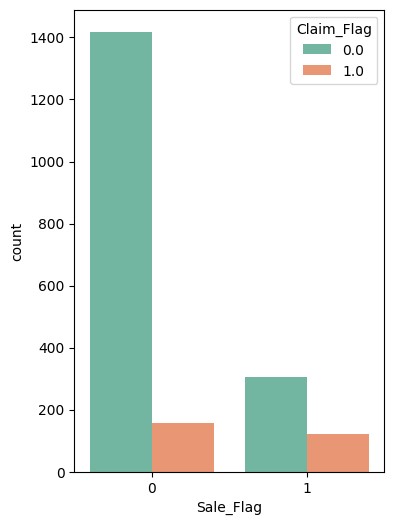

In [74]:
df1.loc[df['Claims_Count']>0, 'Claim_Flag'] = 1
df1.loc[df['Claims_Count']==0, 'Claim_Flag'] = 0
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Sale_Flag',hue='Claim_Flag',data=df1,palette='Set2')
cnt.set_xlabel("Sale_Flag")
cnt.set_ylabel("count")
plt.show()


In [75]:
df1.groupby(['Claim_Flag','Sale_Flag'])['Sale_Flag'].count()

Claim_Flag  Sale_Flag
0.0         0            1419
            1             304
1.0         0             156
            1             121
Name: Sale_Flag, dtype: int64

### More claims, more acceptig offers!

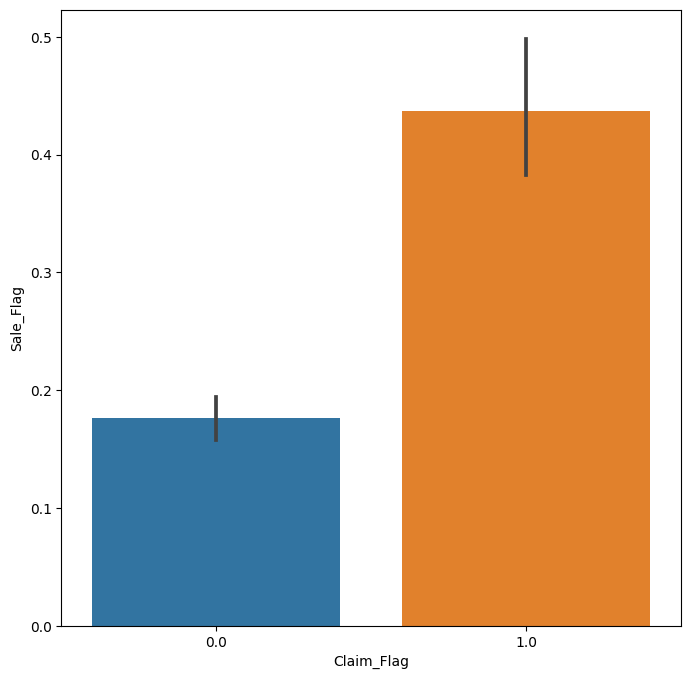

In [76]:
sns.barplot(x='Claim_Flag', y='Sale_Flag', data=df1)
plt.savefig("1.png")

### Violin Plot - Sale_Flag and Claims_Amount : not frequent claims

<Axes: xlabel='Sale_Flag', ylabel='Claims_Amount'>

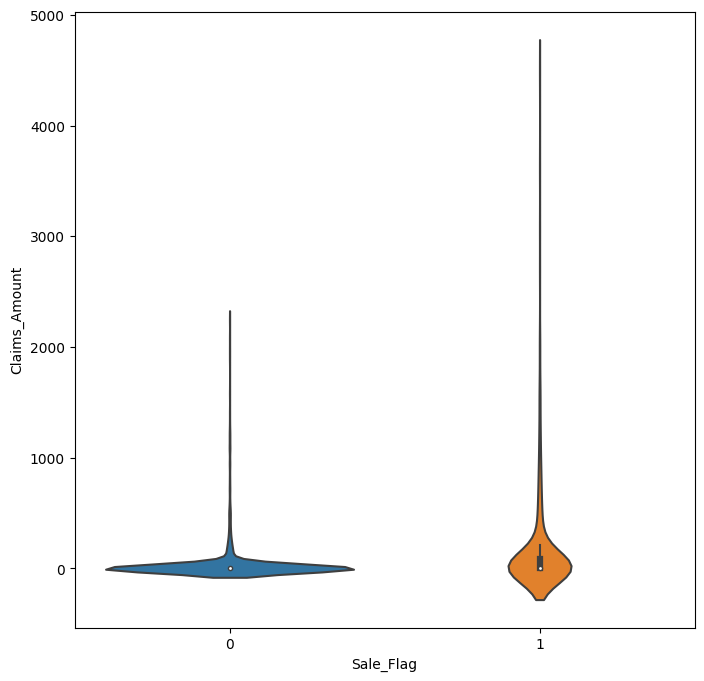

In [77]:
# Violin Plot 
sns.violinplot(x='Sale_Flag', y='Claims_Amount', data=df1)

### not found specific relation overall. But Claims_Amount & Claims_Count positive relation, Premium & Price_Diff weak positive relation

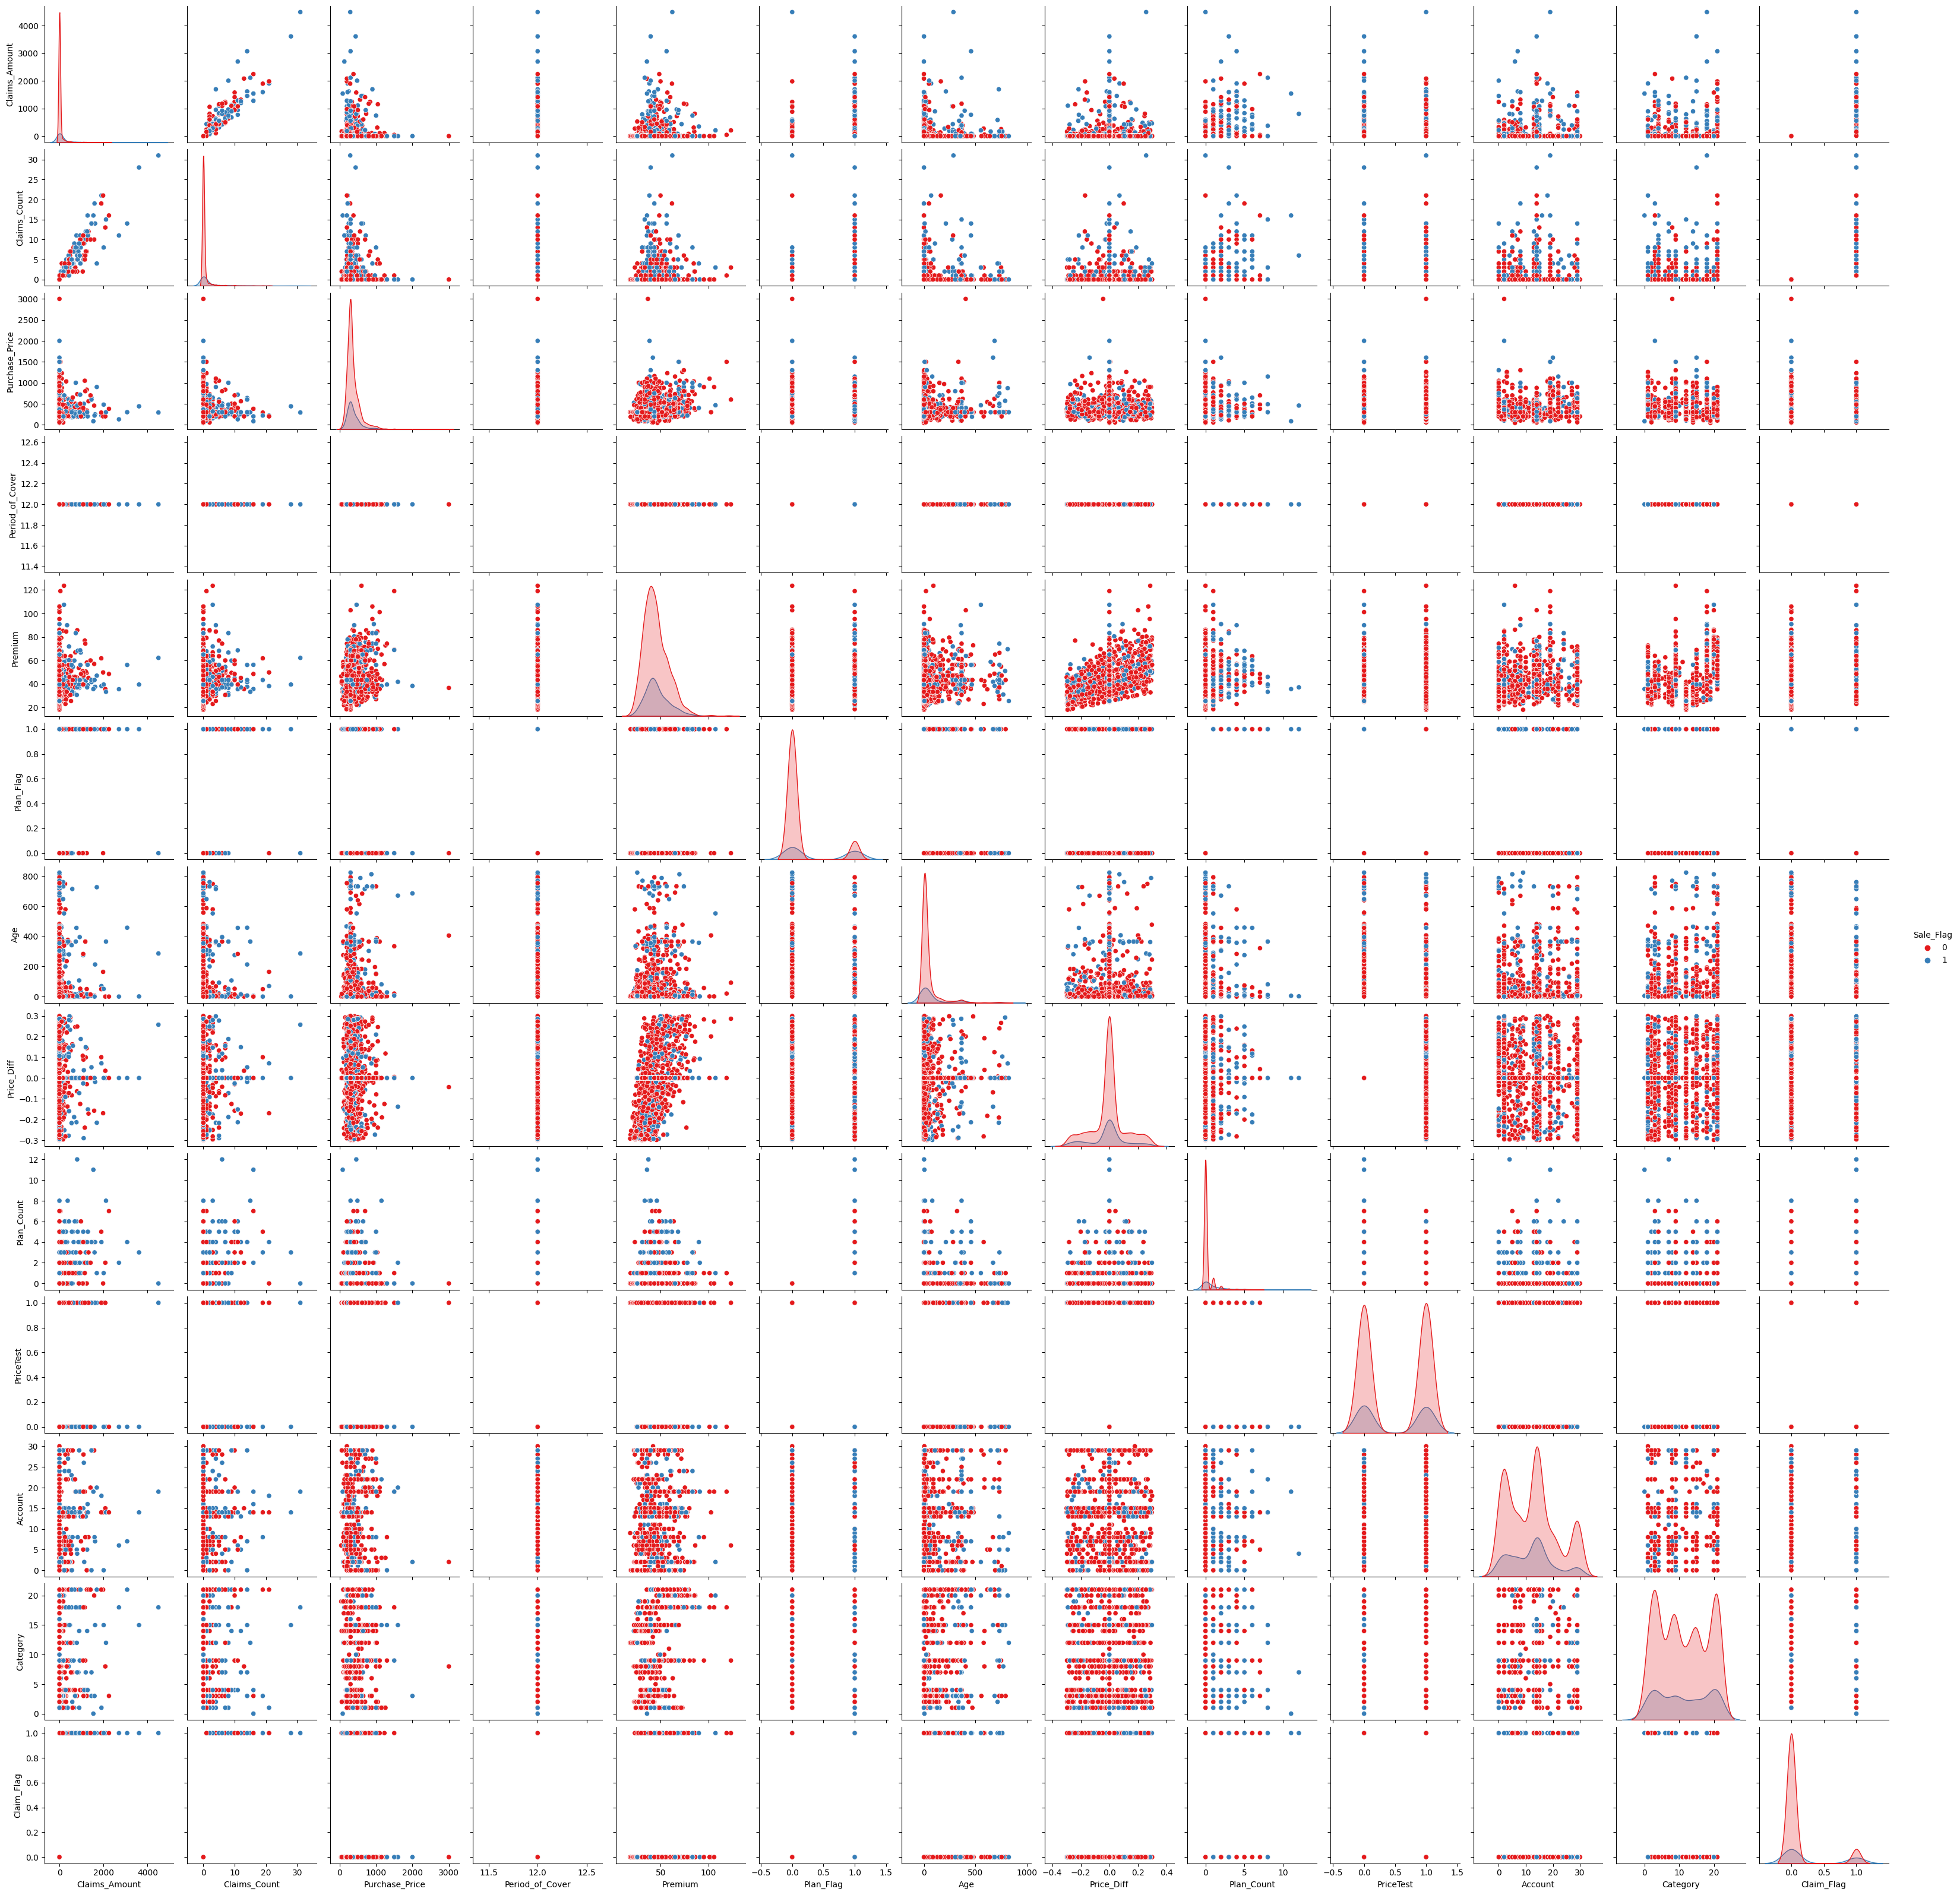

In [78]:
# scatter matrix
sns.pairplot(df1, hue='Sale_Flag', palette='Set1')
plt.savefig("2.png")

### Sale_Flg distribution by price_diff, categorise 0 :no differ, 1:plus differ, 2: minus differ

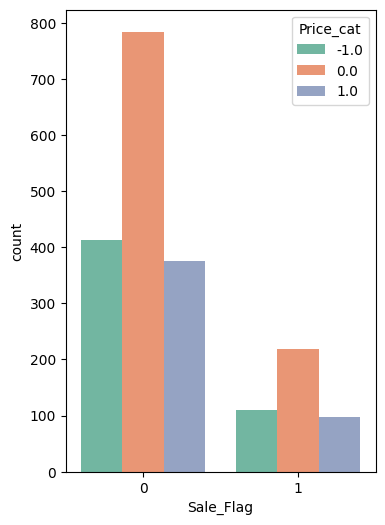

In [79]:
df1.loc[df['Price_Diff']>0, 'Price_cat'] = 1
df1.loc[df['Price_Diff']==0, 'Price_cat'] = 0
df1.loc[df['Price_Diff']<0, 'Price_cat'] = -1

plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Sale_Flag',hue='Price_cat',data=df1,palette='Set2')
cnt.set_xlabel("Sale_Flag")
cnt.set_ylabel("count")
plt.show()

In [80]:
df1.groupby(['Price_cat','Sale_Flag'])['Sale_Flag'].count()

Price_cat  Sale_Flag
-1.0       0            414
           1            109
 0.0       0            785
           1            219
 1.0       0            376
           1             97
Name: Sale_Flag, dtype: int64

### not big difference between Sale_Flag and price category!

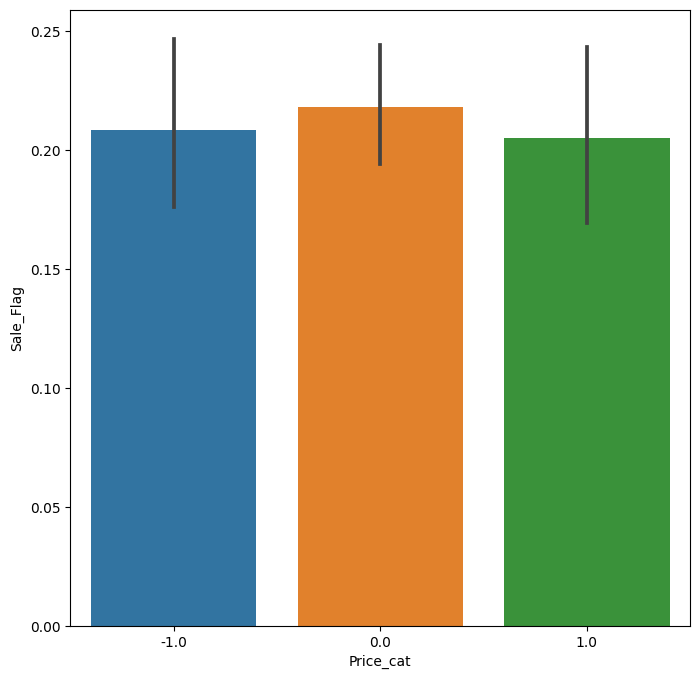

In [81]:
sns.barplot(x='Price_cat', y='Sale_Flag', data=df1)
plt.savefig("3.png")

### check the distribution of labels, maybe need to augment for lable 1?!!?

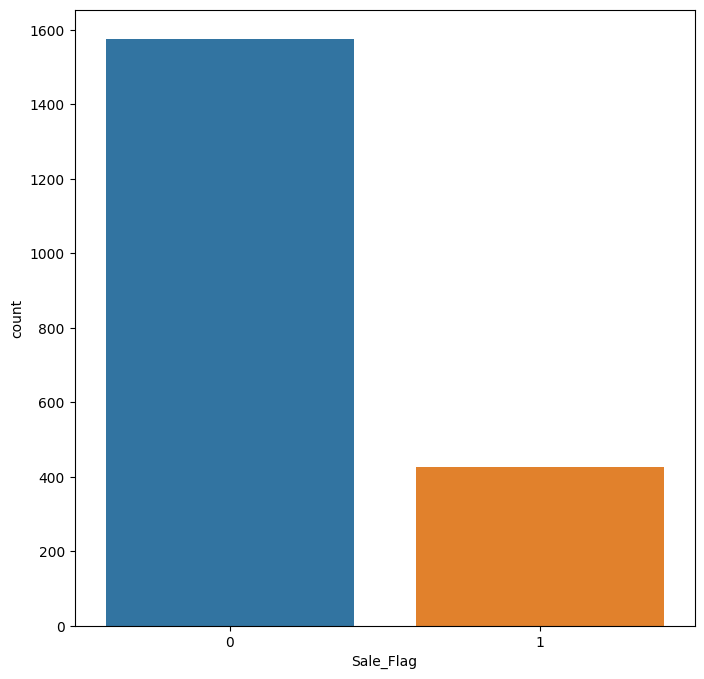

In [82]:
sns.countplot(data=df1, x='Sale_Flag')
plt.savefig("4.png")

### Check the range of numerical variables! - Purchase_Price

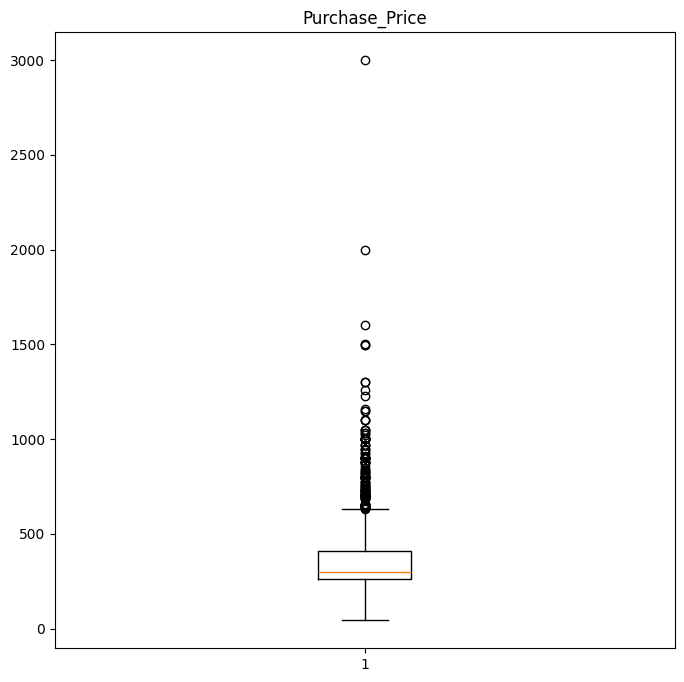

In [83]:
#plt.boxplot(df['Claims_Amount']) # No meaning as a few claims
#plt.boxplot(df['Claims_Count'])  # No meaning as a few claims
plt.boxplot(df1['Purchase_Price']) # relation with category
plt.title('Purchase_Price')
plt.savefig("8.png")

### Maybe need to remove outliers for 'Purchase_Price'

In [84]:
# calculation value for 1/4 percentile and 3/4 percentile
quantile_25 = np.percentile(df1['Purchase_Price'].values, 25)
quantile_75 = np.percentile(df1['Purchase_Price'].values, 75)
# IQR calculation
iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight
# set outliers and return the index
outlier_index = df1['Purchase_Price'][(df1['Purchase_Price'] < lowest_val) | (df1['Purchase_Price'] > highest_val)].index
df1.loc[outlier_index]

Claims_Amount  Claims_Count        Purchase_Date  Purchase_Price  \
4               0.0             0  2021-04-16 00:00:00          700.00   
6               0.0             0           2019-12-11         1000.00   
8               0.0             0           2021-09-30          681.76   
11              0.0             0  2021-06-04 00:00:00         1000.00   
13              0.0             0  2021-11-01 00:00:00         1000.00   
...             ...           ...                  ...             ...   
1932            0.0             0  2021-11-24 00:00:00          999.00   
1954            0.0             0           2019-10-21          750.00   
1961            0.0             0  2021-08-17 00:00:00          924.17   
1972            0.0             0           2021-03-18          799.00   
1975         1412.2            10           2021-10-15          700.00   

      Sale_Flag  Period_of_Cover  Premium  Plan_Flag    Age  Price_Diff  \
4             1               12    61.32          0  180.0   -0.057196   
6             0               12    27.00          0  731.0    0.061321   
8             0               12    67.56          0   13.0   -0.001773   
11            1               12    66.24          0  153.0    0.018450   
13            1               12    40.20          1   10.0    0.209386   
...         ...              ...      ...        ...    ...         ...   
1932          0               12    35.64          0    1.0    0.000000   
1954          1               12    43.32          0  731.0    0.000000   
1961          0               12    37.08          1   92.0    0.000000   
1972          0               12    60.00          0  238.0    0.000000   
1975          0               12    60.00          1   14.0    0.000000   

         Cover_Start_Date  Plan_Count  PriceTest  Account  Category  \
4     2021-10-13 00:00:00           0          1       29        20   
6              2021-12-11           0          1       26         8   
8              2021-10-13           0          1       29        20   
11    2021-11-04 00:00:00           0          1        3         1   
13    2021-11-11 00:00:00           5          1        0         2   
...                   ...         ...        ...      ...       ...   
1932  2021-11-25 00:00:00           0          0        0        15   
1954           2021-10-21           0          0        0         9   
1961  2021-11-17 00:00:00           2          0       22        14   
1972           2021-11-11           0          0       20        21   
1975           2021-10-29           2          0       20        21   

      Claim_Flag  Price_cat  
4            0.0       -1.0  
6            0.0        1.0  
8            0.0       -1.0  
11           0.0        1.0  
13           0.0        1.0  
...          ...        ...  
1932         0.0        0.0  
1954         0.0        0.0  
1961         0.0        0.0  
1972         0.0        0.0  
1975         1.0        0.0  

[141 rows x 17 columns]

In [85]:
print(lowest_val)
print(highest_val)
print(len(df1.loc[outlier_index]))

36.443749999999966
632.59375
141


### Check the range of numerical variables! - Premium

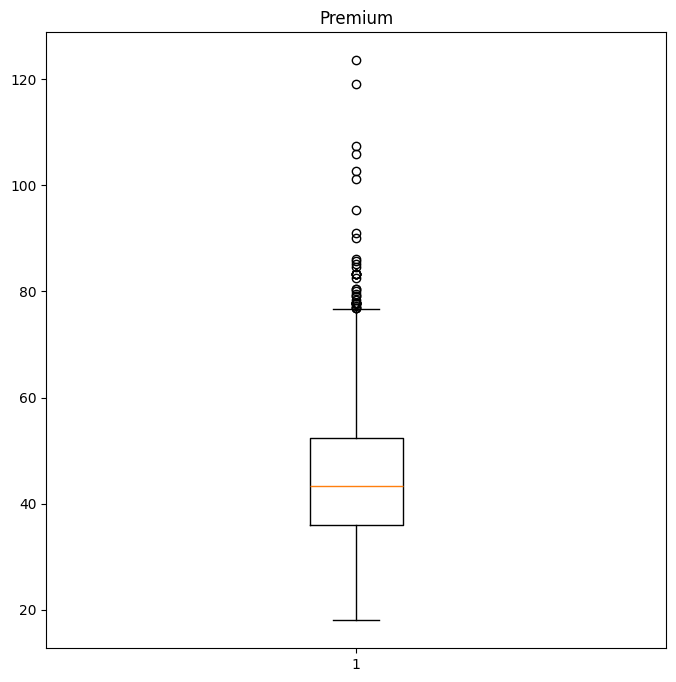

In [86]:
plt.boxplot(df1['Premium'])
plt.title('Premium')
plt.savefig("9.png")

### Action! -> premium outliers remove

In [87]:
# calculation value for 1/4 percentile and 3/4 percentile
quantile_25 = np.percentile(df1['Premium'].values, 25)
quantile_75 = np.percentile(df1['Premium'].values, 75)
# IQR calculation
iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight
# set outliers and return the index
outlier_index = df1['Premium'][(df1['Premium'] < lowest_val) | (df1['Premium'] > highest_val)].index
df.loc[outlier_index]

Claims_Amount  Claims_Count        Purchase_Date  Purchase_Price  \
36           206.98             3           2021-07-25          600.00   
59             0.00             0           2021-09-12          499.00   
91             0.00             0           2021-07-18          360.00   
106            0.00             0           2020-11-01          300.00   
134            0.00             0           2021-11-08          549.00   
192            0.00             0           2021-11-29          360.00   
231            0.00             0           2021-11-11          549.00   
235          164.26             2           2021-11-18          390.00   
313            0.00             0           2021-10-28          899.00   
325            0.00             0  2021-11-29 00:00:00          939.94   
367            0.00             0           2021-03-15          272.78   
405            0.00             0           2021-11-26          332.00   
408            0.00             0           2021-05-31          360.00   
445          307.62             4           2021-09-12         1033.18   
485            0.00             0           2021-10-15          502.30   
572            0.00             0           2021-12-06          559.00   
581            0.00             0  2021-11-27 00:00:00          399.00   
595          809.83             2           2021-11-25          729.00   
683            0.00             0           2021-11-19          509.99   
852            0.00             0           2021-08-31          899.00   
978         1152.80             5           2021-11-26         1049.00   
1080           0.00             0           2021-10-01          829.00   
1096         347.90             4           2020-10-20          400.00   
1121           0.00             0  2021-11-04 00:00:00         1099.00   
1126           0.00             0  2021-12-05 00:00:00          899.00   
1229           0.00             0           2021-11-18          799.00   
1236          44.00             1           2021-10-15         1499.00   
1420         208.03             3  2020-04-22 00:00:00          465.26   
1430           0.00             0           2021-10-25          708.33   
1546           0.00             0           2021-10-29          450.00   
1663           0.00             0  2021-11-20 00:00:00          910.07   
1675           0.00             0           2021-12-11          419.00   
1742          82.13             1  2021-11-19 00:00:00          588.53   
1743           0.00             0           2021-10-24          899.00   
1745           0.00             0           2021-08-05          530.00   
1768           0.00             0           2021-10-27          390.00   
1785           0.00             0           2021-11-09          219.00   
1848           0.00             0           2021-11-16          449.00   
1893         743.00             8           2020-11-09         1000.00   

      Sale_Flag  Period_of_Cover  Premium  Plan_Flag    Age  Price_Diff  \
36            0               12   123.60          0   92.0    0.285893   
59            0               12    77.64          0   35.0    0.216165   
91            0               12    76.92          0   92.0    0.282000   
106           0               12   102.72          0  406.0    0.200561   
134           0               12    77.28          0    5.0    0.042071   
192           0               12    86.16          0    0.0    0.175123   
231           0               12    78.36          1    1.0    0.077558   
235           0               12    85.20          0    0.0    0.093991   
313           0               12   105.96          0    1.0    0.272334   
325           1               12    90.96          1    1.0    0.092219   
367           0               12    79.44          0  245.0    0.298039   
405           0               12    77.76          0    0.0    0.296000   
408           0               12    76.92          0  184.0    0.28200

In [88]:
print(lowest_val)
print(highest_val)
print(len(df1.loc[outlier_index]))

11.52
76.8
39


### Check the range of numerical variables! - Age

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd71cf2f310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd72002f0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd71cf2f5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd72002fdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd72002ff40>],
 'means': []}

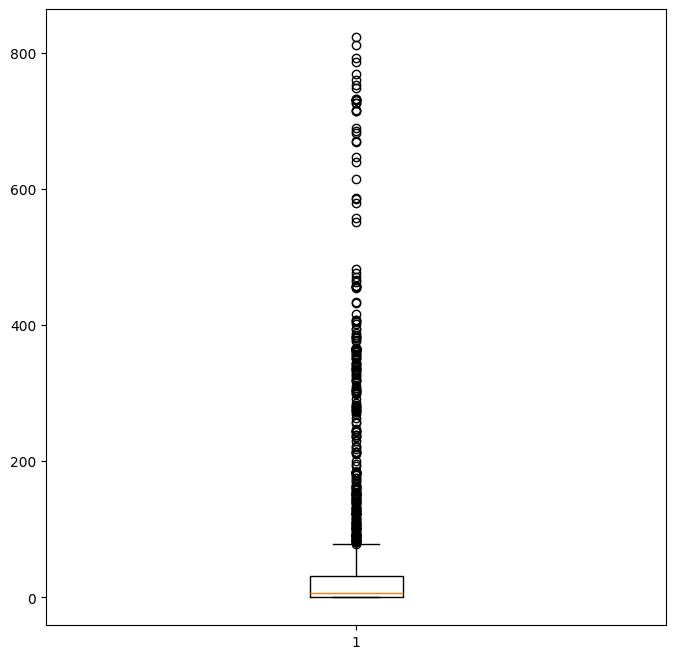

In [89]:
plt.boxplot(df1['Age'])

### Check the range of numerical variables! - Price_Diff

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd71cfaa760>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd71cfaaca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd71cfaa4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd71cfba250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd71cfba4f0>],
 'means': []}

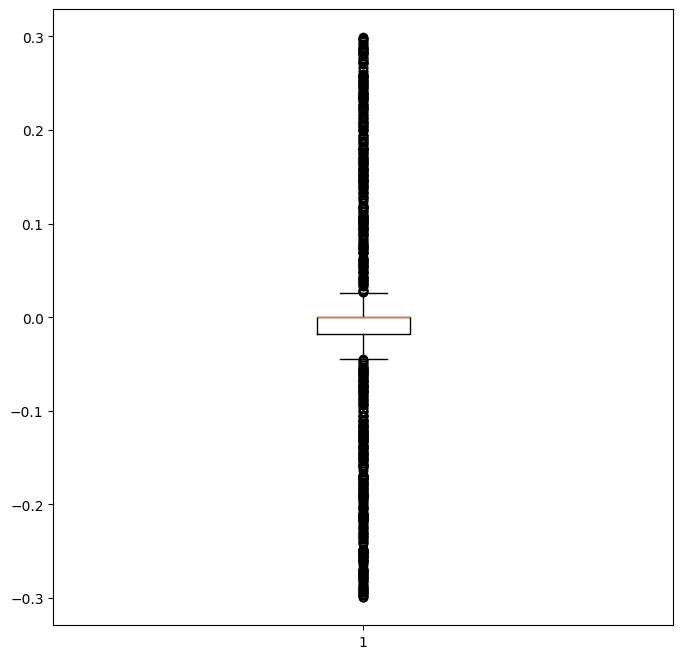

In [90]:
plt.boxplot(df1['Price_Diff'])

### Check the range of numerical variables! - Plan_Count

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd71cfba880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd71d01d9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd71d01d400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd71d01df10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd71d2051f0>],
 'means': []}

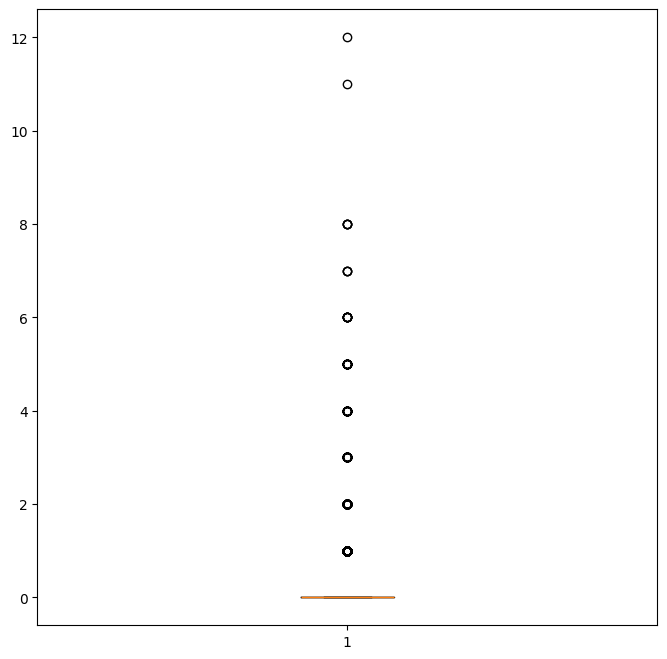

In [91]:
plt.boxplot(df1['Plan_Count'])

### Respectively, the number of outliers in premium, purchase_price is less than others. 

### Age = cover_date - purchase_date, There are wrong calculation in Age. Add new column 'Age_mod' .

In [92]:
df1[(pd.to_datetime(df1['Cover_Start_Date']) - pd.to_datetime(df1['Purchase_Date'])).dt.days != df1['Age']]


Claims_Amount  Claims_Count        Purchase_Date  Purchase_Price  \
24             0.00             0           2020-03-18           299.0   
32          1240.20             7           2021-09-11           836.0   
41             0.00             0           2021-05-03           599.0   
59             0.00             0           2021-09-12           499.0   
80             0.00             0           2021-11-03           200.0   
...             ...           ...                  ...             ...   
1852         555.94             5           2020-09-17           299.0   
1881           0.00             0           2021-11-04           200.0   
1918          85.03             1  2021-11-01 00:00:00           200.0   
1950         944.10            10           2021-10-01           500.0   
1969           0.00             0           2021-04-14           359.0   

      Sale_Flag  Period_of_Cover  Premium  Plan_Flag    Age  Price_Diff  \
24            0               12    72.84          0  477.0    0.297009   
32            0               12    49.56          0   50.0    0.144044   
41            0               12    50.28          0   92.0    0.160665   
59            0               12    77.64          0   35.0    0.216165   
80            0               12    33.24          0    0.0   -0.034843   
...         ...              ...      ...        ...    ...         ...   
1852          1               12    56.16          0  341.0    0.000000   
1881          1               12    45.96          0    0.0    0.000000   
1918          0               12    48.48          1    0.0    0.000000   
1950          0               12    43.32          1   52.0    0.000000   
1969          0               12    56.16          0  161.0    0.000000   

         Cover_Start_Date  Plan_Count  PriceTest  Account  Category  \
24             2021-10-08           0          1       15        21   
32             2021-11-08           0          1        0         3   
41             2021-10-29           0          1        2         9   
59             2021-10-21           0          1       13        21   
80             2021-11-02           0          1       14         8   
...                   ...         ...        ...      ...       ...   
1852           2021-10-08           0          0       14        21   
1881           2021-10-25           0          0       15         4   
1918  2021-10-26 00:00:00           4          0       14         9   
1950           2021-11-16           3          0       15         9   
1969           2021-11-08           0          0       13        21   

      Claim_Flag  Price_cat  
24           0.0        1.0  
32           1.0        1.0  
41           0.0        1.0  
59           0.0        1.0  
80           0.0       -1.0  
...          ...        ...  
1852         1.0        0.0  
1881         0.0        0.0  
1918         1.0        0.0  
1950         1.0        0.0  
1969         0.0        0.0  

[85 rows x 17 columns]

In [93]:
df1['Age_Mod'] = (pd.to_datetime(df1['Cover_Start_Date']) - pd.to_datetime(df1['Purchase_Date'])).dt.days

In [94]:
print(df1['Age_Mod'].min())
print(df1['Age_Mod'].max())

-22
823


### Set 0 to Age_Mod if Age_Mod < 0

In [95]:
df1.loc[df1['Age_Mod']<0, 'Age_Mod'] = 0

### each feature is normalised or not?

/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

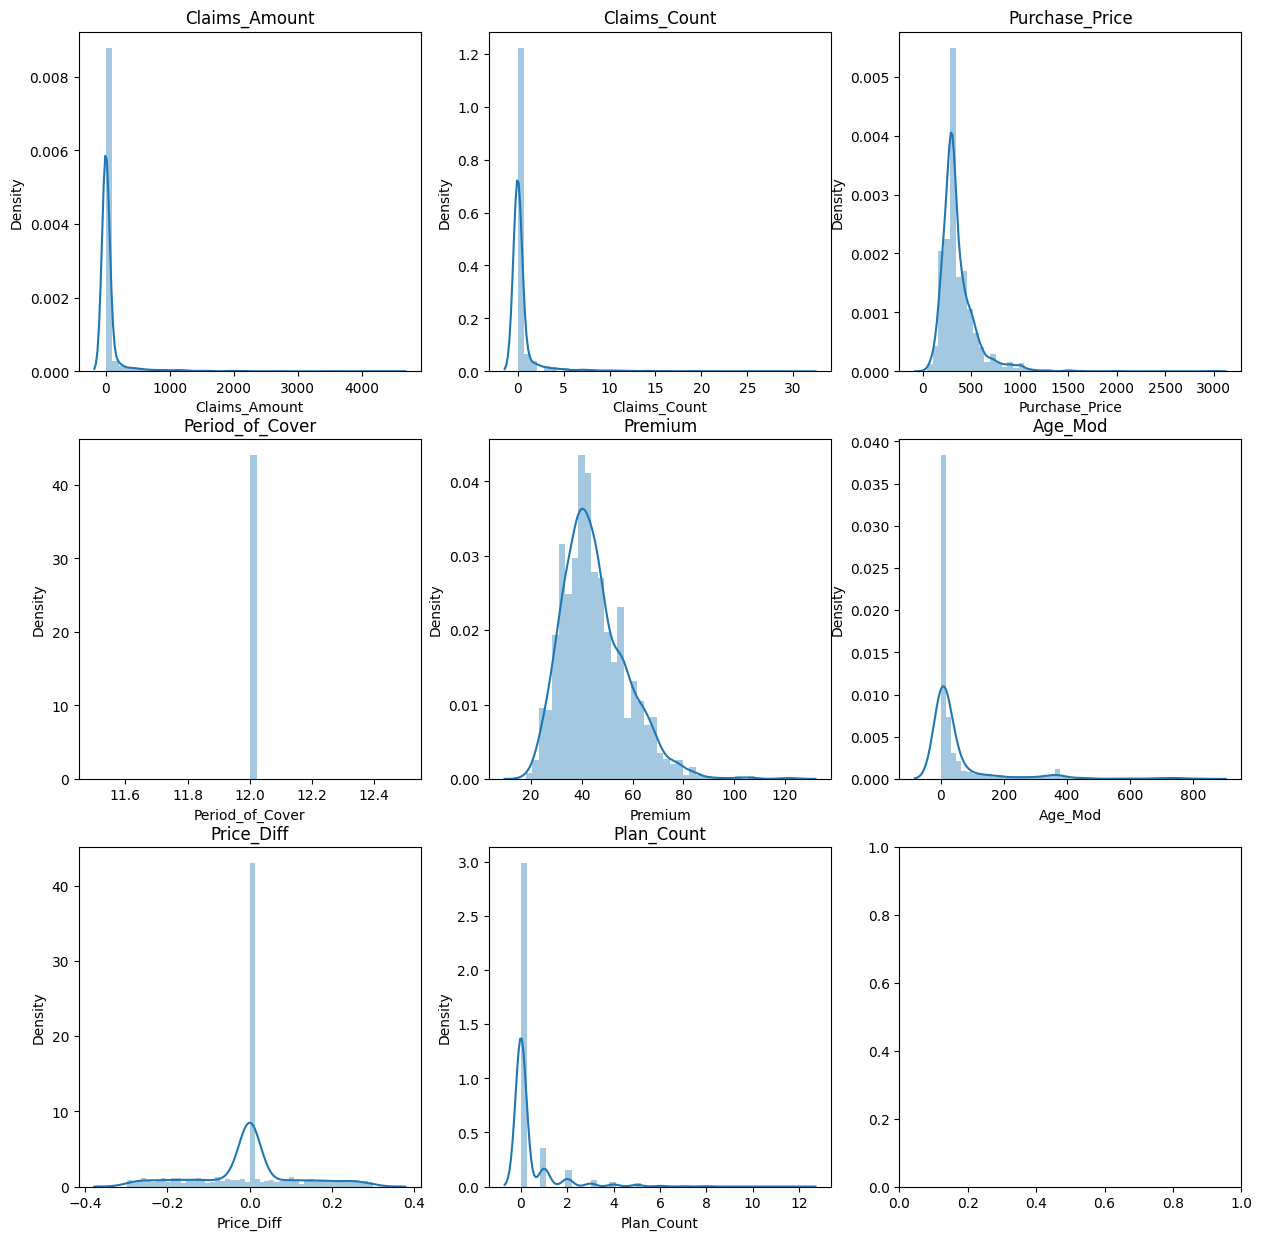

In [96]:
dfs1 = ['Claims_Amount', 'Claims_Count', 'Purchase_Price', 'Period_of_Cover', 'Premium',
       'Age_Mod', 'Price_Diff', 'Plan_Count']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

i=0
for row in range(3):
    for col in range(3):
        idx = (row * 3 + col)

        if idx < len(dfs1):
            ax = axes[row][col]
            dfidx = dfs1[idx]
            sns.distplot(df1[dfidx], ax=ax)
            ax.set(xlabel=dfidx, title=dfidx)
            
plt.savefig("10.png")            


# Check the skew > 1 and these log transform needed

In [97]:

# Generally, highly data biased when skew() > 1.

from scipy.stats import skew

features_index = ['Claims_Amount', 'Claims_Count', 'Purchase_Price', 'Period_of_Cover', 'Premium',
       'Age_Mod', 'Price_Diff', 'Plan_Count']

skew_features = df1[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]

print(skew_features_top.sort_values(ascending=False))

Claims_Amount     7.430627
Claims_Count      6.499640
Plan_Count        4.262453
Age_Mod           3.478351
Purchase_Price    3.403868
Premium           1.004619
dtype: float64


In [98]:
skew_features_top.index

Index(['Claims_Amount', 'Claims_Count', 'Purchase_Price', 'Premium', 'Age_Mod',
       'Plan_Count'],
      dtype='object')

### Correlation 'Claims_Amount' & 'Claims_Count' , ('Claims_Amount' & 'Claims_Count') & Plan_Count

<Axes: >

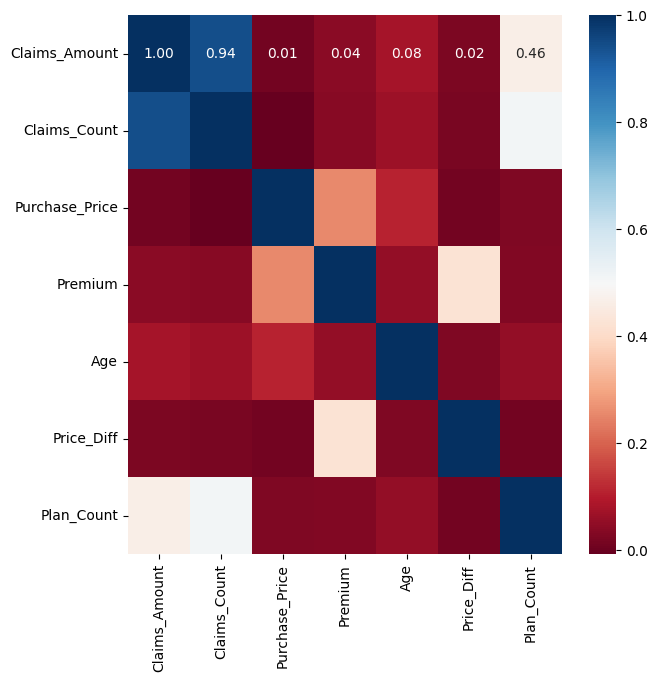

In [99]:


idx = ['Claims_Amount', 'Claims_Count', 'Purchase_Price', 'Premium', 'Age', 'Price_Diff', 'Plan_Count']

corr = df1[idx].corr()
#plt.figure(figsize=(8,8))
#sns.heatmap(corr, cmap='RdBu', fmt=".2f", annot=True, annot_kws={'size': 10})

plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap='RdBu', fmt=".2f", annot=True)


### categorical variable data distribution! Plan_Flag=0:has had a plan, Plan_Flag=1:has a plan

In [100]:
print(' Plan_Flag :\n',df1['Plan_Flag'].value_counts())
print('\n Plan_Count :\n',df1['Plan_Count'].value_counts())
print('\n Account :\n',df1['Account'].value_counts())
print('\n Category :\n',df1['Category'].value_counts())

 Plan_Flag :
 0    1630
1     370
Name: Plan_Flag, dtype: int64

 Plan_Count :
 0     1630
1      196
2       83
3       32
4       23
5       19
6        8
8        4
7        3
11       1
12       1
Name: Plan_Count, dtype: int64

 Account :
 14    337
2     333
29    220
15    185
13    125
0     124
19    109
8     107
22     68
7      60
6      58
5      48
9      40
4      32
10     21
3      15
20     14
18     14
26     12
21     12
28     11
27      8
1       7
16      7
11      7
23      7
24      6
25      6
17      5
30      1
12      1
Name: Account, dtype: int64

 Category :
 21    367
9     238
15    224
3     173
4     167
12    150
1     137
18    109
2      98
7      97
20     73
8      63
14     48
6      19
17     12
19     12
16      5
10      3
11      2
13      1
0       1
5       1
Name: Category, dtype: int64


### more accepting an offer if they has a plan (Plan_Flag=1) 

In [101]:
df1.groupby(['Plan_Flag','Sale_Flag'])['Sale_Flag'].count()

Plan_Flag  Sale_Flag
0          0            1379
           1             251
1          0             196
           1             174
Name: Sale_Flag, dtype: int64

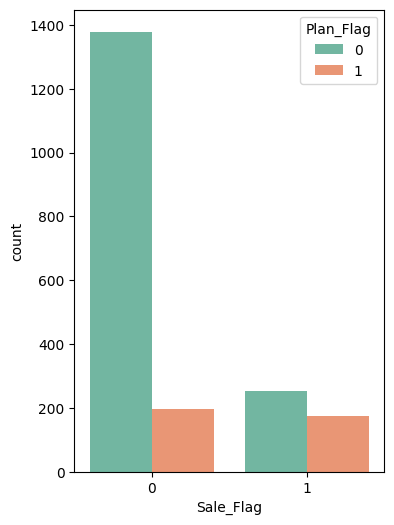

In [102]:
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Sale_Flag',hue='Plan_Flag',data=df1,palette='Set2')
cnt.set_xlabel("Sale_Flag")
cnt.set_ylabel("count")
plt.show()

<Axes: xlabel='Plan_Flag', ylabel='Sale_Flag'>

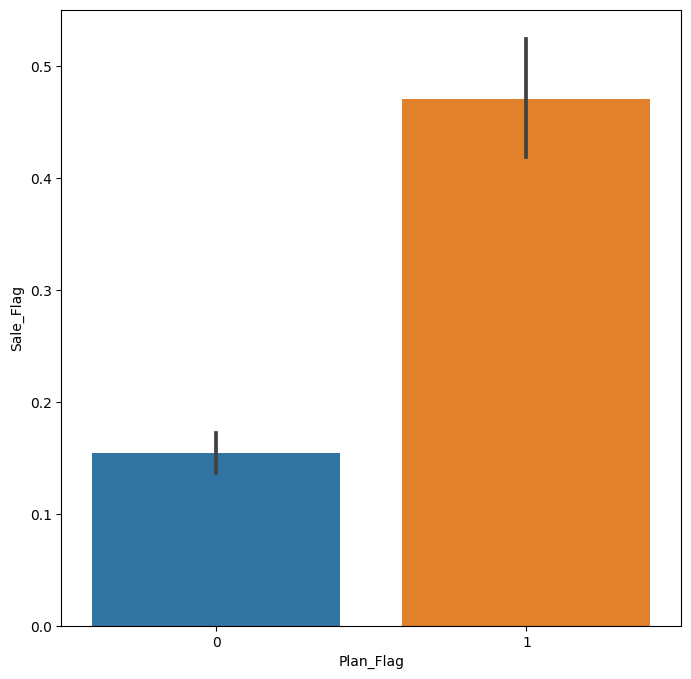

In [103]:
sns.barplot(x='Plan_Flag', y='Sale_Flag', data=df1)

###  more accepting an offer if they have more Plan_Count

In [104]:
df1.groupby(['Plan_Count','Sale_Flag'])['Sale_Flag'].count()

Plan_Count  Sale_Flag
0           0            1379
            1             251
1           0             125
            1              71
2           0              40
            1              43
3           0              11
            1              21
4           0               9
            1              14
5           0               6
            1              13
6           0               2
            1               6
7           0               3
8           1               4
11          1               1
12          1               1
Name: Sale_Flag, dtype: int64

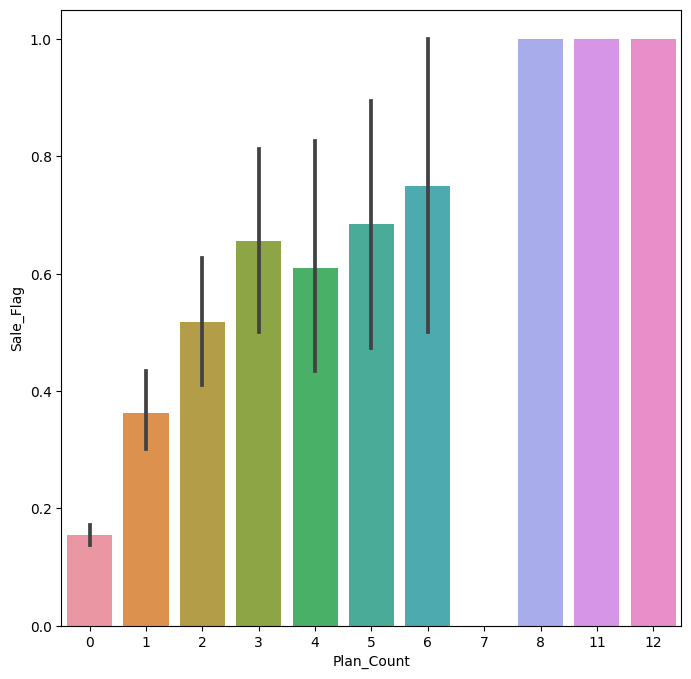

In [105]:
sns.barplot(x='Plan_Count', y='Sale_Flag', data=df1)
plt.savefig("5.png")

### proportion Plan_Count when Sale_Flag=1,  Plan_Count 1~6 positive relation with Sale_Flag

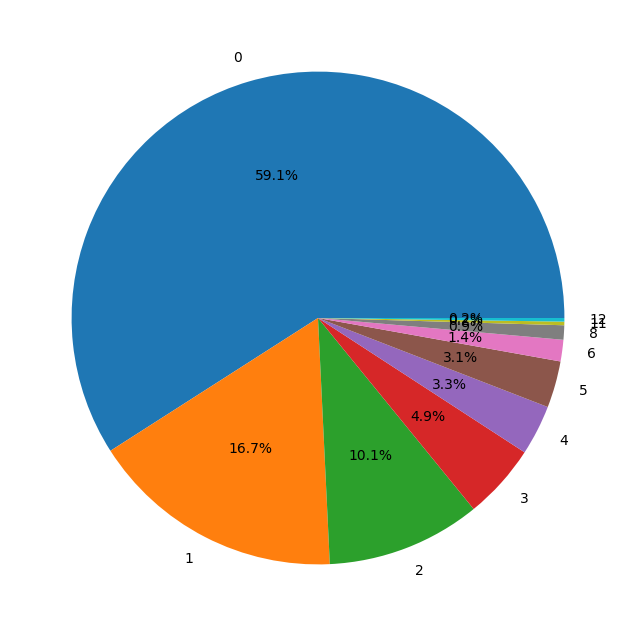

In [106]:
df1['rn'] = df1.index
df1_pie = df1[df1['Sale_Flag']==1].groupby(['Plan_Count'])['rn'].count().to_frame()
plt.rcParams['figure.figsize'] = [8, 8]
plt.pie(df1_pie['rn'], labels=['0','1','2','3','4','5','6','8','11','12'], autopct='%.1f%%')

plt.show()

### Categorise Age - More Age, more accepting an offer, but more acceping an offer whe Age_Cat=3 and no plan currently

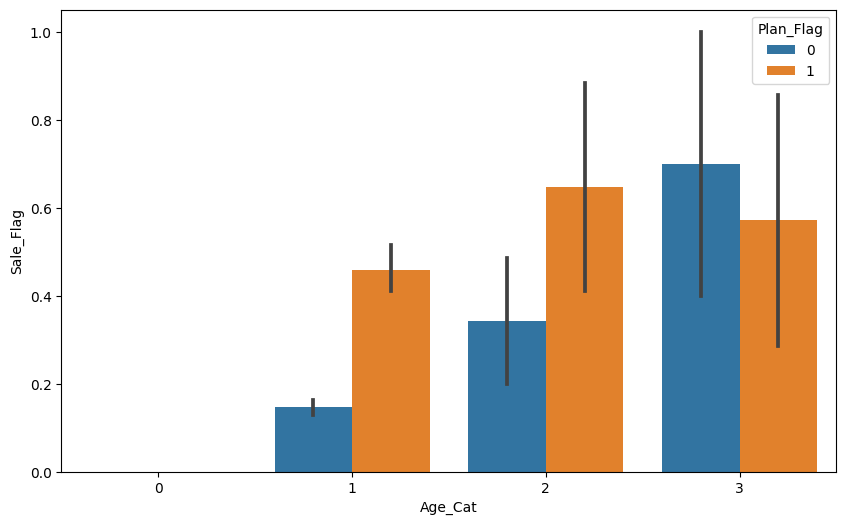

In [107]:
# The function returning age category 
def get_category(age):
    cat = ''
    if age <= 365: cat = 1
    elif age <= 365*2: cat = 2
    elif age <= 365*3: cat = 3
    else : cat = 0
    
    return cat

plt.figure(figsize=(10,6))

group_names = [0, 1, 2, 3]

# get_category(X)- input 'Age_Mod' return category (0,1,2,3)
df1['Age_Cat'] = df1['Age_Mod'].apply(lambda x : get_category(x))
sns.barplot(x='Age_Cat', y = 'Sale_Flag', hue='Plan_Flag', data=df1, order=group_names)
plt.savefig("6.png")

### Overall, more age, more acceptig an offer!

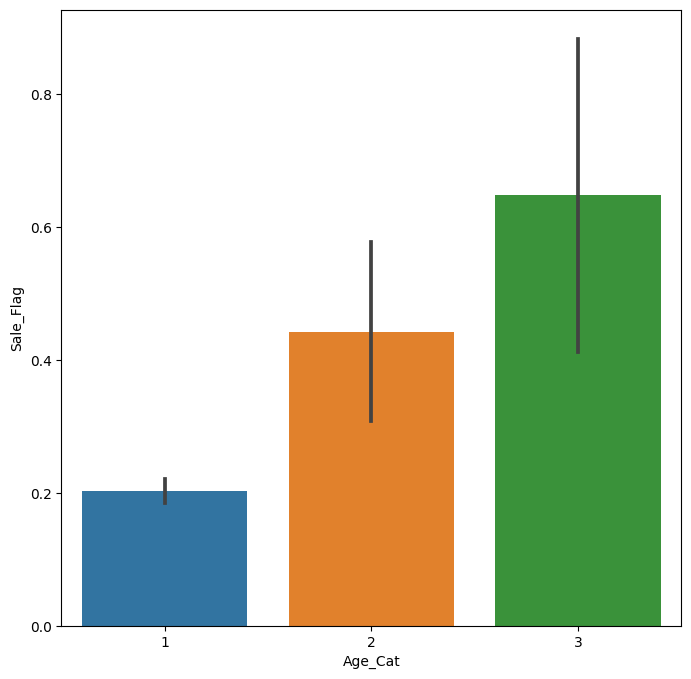

In [108]:
sns.barplot(x='Age_Cat', y='Sale_Flag', data=df1)
plt.savefig("7.png")

### count(Sale_Flag) by Age_cat

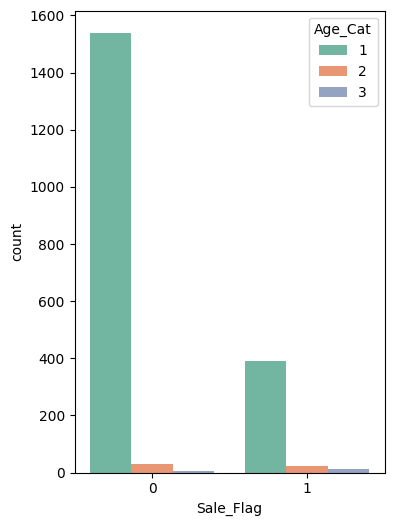

In [109]:

plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Sale_Flag',hue='Age_Cat',data=df1,palette='Set2')
cnt.set_xlabel("Sale_Flag")
cnt.set_ylabel("count")
plt.show()


### count of accepting an offer by account,  too many account  and no relation with Sale_Flag!

In [110]:
df1.groupby(['Account','Sale_Flag'])['Sale_Flag'].count()

Account  Sale_Flag
0        0             96
         1             28
1        0              5
         1              2
2        0            282
         1             51
3        0             10
         1              5
4        0             26
         1              6
5        0             37
         1             11
6        0             46
         1             12
7        0             37
         1             23
8        0             83
         1             24
9        0             34
         1              6
10       0             18
         1              3
11       0              5
         1              2
12       0              1
13       0             99
         1             26
14       0            246
         1             91
15       0            140
         1             45
16       0              3
         1              4
17       0              4
         1              1
18       0             11
         1              3
19       0         

<Axes: xlabel='Account', ylabel='Sale_Flag'>

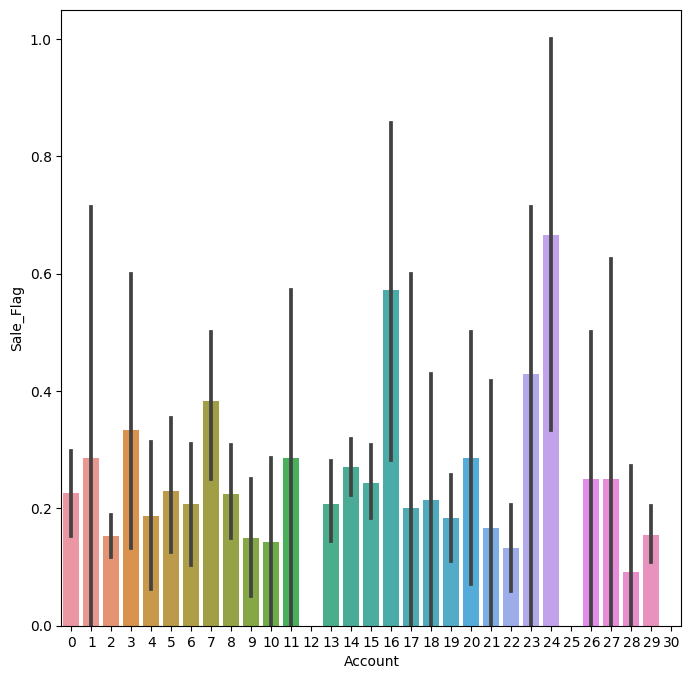

In [111]:
sns.barplot(x='Account', y='Sale_Flag', data=df1)

### count of accepting an offer by Category,  too many Category  and no relation with Sale_Flag! 

In [112]:
df1.groupby(['Category','Sale_Flag'])['Sale_Flag'].count()

Category  Sale_Flag
0         1              1
1         0             93
          1             44
2         0             87
          1             11
3         0            140
          1             33
4         0            127
          1             40
5         0              1
6         0             16
          1              3
7         0             82
          1             15
8         0             56
          1              7
9         0            180
          1             58
10        0              2
          1              1
11        0              2
12        0            122
          1             28
13        0              1
14        0             39
          1              9
15        0            182
          1             42
16        0              4
          1              1
17        0             10
          1              2
18        0             82
          1             27
19        0             10
          1              2
20      

<Axes: xlabel='Category', ylabel='Sale_Flag'>

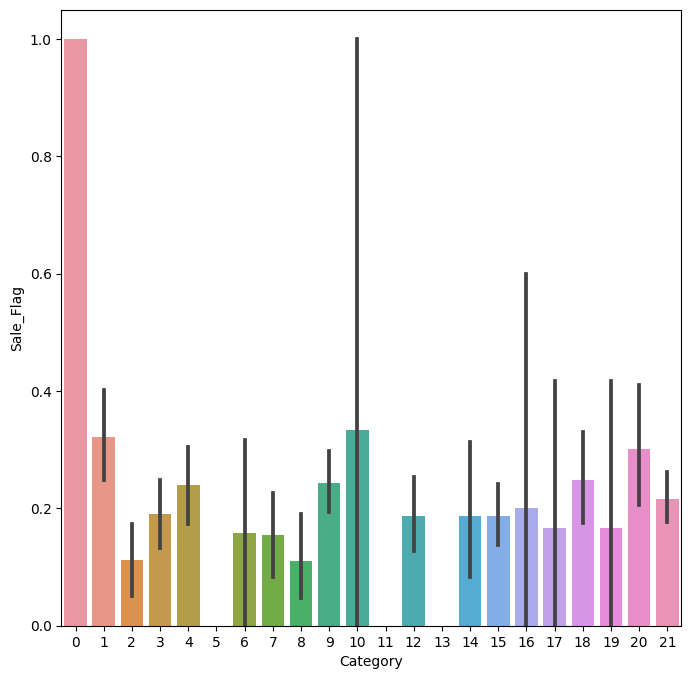

In [113]:
sns.barplot(x='Category', y='Sale_Flag', data=df1)

# b) Price Elasticity

In [114]:
def calc_elasticity(df):
    cv_pt = ((df['PriceTest']== 1) & (df['Sale_Flag']== 1)).sum() / (df['PriceTest']== 1).sum() * 100
    cv_fp = ((df['PriceTest']== 0) & (df['Sale_Flag']== 1)).sum() / (df['PriceTest']== 0).sum() * 100
    avg_pt = df.loc[df['PriceTest'] == 1, 'Premium'].mean()
    avg_fp = df.loc[df['PriceTest'] == 0, 'Premium'].mean()
    
    elasticity = ((cv_pt - cv_fp)/cv_fp) / ((avg_pt - avg_fp)/avg_fp)
    return elasticity

In [115]:
calc_elasticity(df)

2.0588717045059783

# c) Build Models with various conditions
### preprocess

In [116]:
# Age preprocess
# Age correction & categorising
def age_process(df):
    df['Age_Mod'] = (pd.to_datetime(df['Cover_Start_Date']) - pd.to_datetime(df['Purchase_Date'])).dt.days
    df.loc[df['Age_Mod']<0, 'Age_Mod'] = 0
    
    group_names = ['Unknown', '1', '2', '3']

    # get_category(X) : input 'Age' return category(0,1,2,3) 
    df['Age_Cat'] = df['Age_Mod'].apply(lambda x : get_category(x))
    
    return df


def get_category(age):
    cat = ''
    if age <= 365: cat = 1
    elif age <= 365*2: cat = 2
    elif age <= 365*3: cat = 3
    else : cat = 0
    
    return cat

def set_CF(df):
    df.loc[df['Claims_Count']>0, 'Claim_Flag'] = 1
    df.loc[df['Claims_Count']==0, 'Claim_Flag'] = 0
    return df

def set_PC(df):
    df.loc[df['Price_Diff']>0, 'Price_cat'] = 1
    df.loc[df['Price_Diff']==0, 'Price_cat'] = 0
    df.loc[df['Price_Diff']<0, 'Price_cat'] = -1
    return df

# Remove unnecessary features
def drop_features(df, gb):
    if gb == 0:
        df.drop(['PriceTest','Purchase_Date','Cover_Start_Date','level_0','index', 'Age', 'Account'],axis=1,inplace=True)
        
    else:
        df.drop(['Purchase_Date','Cover_Start_Date','level_0','index', 'Age', 'Account'],axis=1,inplace=True)
    #df.drop(['Purchase_Date','Cover_Start_Date','level_0','index', 'Age', 'Account'],axis=1,inplace=True)
    return df


# Remove outliers 
def get_outlier(df=None, column=None, weight=1.5):
    # calculation value for 1/4 percentile and 3/4 percentile
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    # IQR calculation
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # set outliers and return the index
    outlier_index = df[column][(df[column] < lowest_val) | (df[column] > highest_val)].index
    return outlier_index

# removing outliers function
def remove_outlier_df(df, col):
    df_copy = df.copy()
    #df_copy = df_copy.reset_index()
    # call outlier function
    outlier_index = get_outlier(df=df_copy, column=col, weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    #df_copy = df_copy.reset_index()
    return df_copy.reset_index()

# Data Preprocessing call
def transform_features(df, gb):
    df = age_process(df)
    
    df = set_CF(df)
    df = set_PC(df)    
    
    columns = ['Purchase_Price','Premium']
    for col in columns:
        df = remove_outlier_df(df,col)
        
    df = drop_features(df, gb)
        
    return df

### Metrics function

In [123]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, roc_curve, f1_score, roc_auc_score
# Metrics
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion matrix')
    print(confusion)
    # ROC-AUC print
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### Model function

In [124]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


def LR(X_train, y_train, X_test, y_test):
    lr_clf = LogisticRegression()
    lr_clf.fit(X_train , y_train)
    pred = lr_clf.predict(X_test)
    pred_proba = lr_clf.predict_proba(X_test)[:, 1]
    
    return get_clf_eval(y_test , pred, pred_proba)
    
    
def XGB(X_train, y_train, X_test, y_test):
    xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
    xgb_wrapper.fit(X_train, y_train)
    w_preds = xgb_wrapper.predict(X_test)
    w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
    
    return get_clf_eval(y_test , w_preds, w_pred_proba)


def LGBM(X_train, y_train, X_test, y_test):
    # n_estimators = 400 same as XGBoost
    lgbm_wrapper = LGBMClassifier(n_estimators=400)
    
    lgbm_wrapper.fit(X_train, y_train)
    preds = lgbm_wrapper.predict(X_test)
    pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]
    
    return get_clf_eval(y_test, preds, pred_proba)


def RF(X_train, y_train, X_test, y_test):
    rf_clf = RandomForestClassifier(random_state=0)

    rf_clf.fit(X_train , y_train)
    pred = rf_clf.predict(X_test)
    pred_proba = rf_clf.predict_proba(X_test)[:, 1]
    
    return get_clf_eval(y_test, pred, pred_proba)


def MLP(X_train, y_train, X_test, y_test):
    #(MLP) train
    mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
    mlp.fit(X_train, y_train)
    
    # predict
    y_pred = mlp.predict(X_test)
    y_pred_proba = mlp.predict_proba(X_test)[:, 1]
    
    return get_clf_eval(y_test, y_pred, y_pred_proba)

### case1) age correction('Age_Mod'), derived variables ('Age_Cat', 'Claim_Flag', 'Price_cat'), remove outliers (purchase_price, Premium)

In [125]:
X_df1 = transform_features(df, 0)
y_df1 = X_df1['Sale_Flag']
X_df1= X_df1.drop('Sale_Flag',axis=1)

### split train and test

In [126]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_df1, y_df1, test_size=0.2, random_state=15)

### Model training & prediction

In [127]:
LR(X_train1, y_train1, X_test1, y_test1)
XGB(X_train1, y_train1, X_test1, y_test1)
LGBM(X_train1, y_train1, X_test1, y_test1)
RF(X_train1, y_train1, X_test1, y_test1)
MLP(X_train1, y_train1, X_test1, y_test1)

/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion matrix
[[292   5]
 [ 53  16]]
accuracy: 0.8415, precision: 0.7619, recall: 0.2319,    F1: 0.3556, AUC:0.7219
confusion matrix
[[282  15]
 [ 46  23]]
accuracy: 0.8333, precision: 0.6053, recall: 0.3333,    F1: 0.4299, AUC:0.7221
confusion matrix
[[270  27]
 [ 48  21]]
accuracy: 0.7951, precision: 0.4375, recall: 0.3043,    F1: 0.3590, AUC:0.7053
confusion matrix
[[276  21]
 [ 49  20]]
accuracy: 0.8087, precision: 0.4878, recall: 0.2899,    F1: 0.3636, AUC:0.7414
confusion matrix
[[268  29]
 [ 43  26]]
accuracy: 0.8033, precision: 0.4727, recall: 0.3768,    F1: 0.4194, AUC:0.6642


### case2) features standardisation

In [128]:

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_df1, test_size = 0.2, random_state = 15)

### Model training & prediction

In [129]:
LR(X_train2, y_train2, X_test2, y_test2)
XGB(X_train2, y_train2, X_test2, y_test2)
LGBM(X_train2, y_train2, X_test2, y_test2)
RF(X_train2, y_train2, X_test2, y_test2)
MLP(X_train2, y_train2, X_test2, y_test2)

confusion matrix
[[291   6]
 [ 53  16]]
accuracy: 0.8388, precision: 0.7273, recall: 0.2319,    F1: 0.3516, AUC:0.7572
confusion matrix
[[282  15]
 [ 46  23]]
accuracy: 0.8333, precision: 0.6053, recall: 0.3333,    F1: 0.4299, AUC:0.7221
confusion matrix
[[260  37]
 [ 47  22]]
accuracy: 0.7705, precision: 0.3729, recall: 0.3188,    F1: 0.3438, AUC:0.6872
confusion matrix
[[277  20]
 [ 48  21]]
accuracy: 0.8142, precision: 0.5122, recall: 0.3043,    F1: 0.3818, AUC:0.7398
confusion matrix
[[284  13]
 [ 55  14]]
accuracy: 0.8142, precision: 0.5185, recall: 0.2029,    F1: 0.2917, AUC:0.7526


/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### case3) Make the same proportion of labels in train and test data

In [130]:
X_train3, X_test3, y_train3, y_test3 = \
train_test_split(X_scaled, y_df1, test_size=0.2, random_state=15, stratify=y_df1)
    
print('ratio of train data lables')
print(y_train3.value_counts()/y_train3.shape[0] * 100)
print('ratio of test data lables')
print(y_test3.value_counts()/y_test3.shape[0] * 100)

ratio of train data lables
0    79.098361
1    20.901639
Name: Sale_Flag, dtype: float64
ratio of test data lables
0    79.234973
1    20.765027
Name: Sale_Flag, dtype: float64


### Model training & prediction

In [131]:
LR(X_train3, y_train3, X_test3, y_test3)
XGB(X_train3, y_train3, X_test3, y_test3)
LGBM(X_train3, y_train3, X_test3, y_test3)
RF(X_train3, y_train3, X_test3, y_test3)
MLP(X_train3, y_train3, X_test3, y_test3)

confusion matrix
[[281   9]
 [ 64  12]]
accuracy: 0.8005, precision: 0.5714, recall: 0.1579,    F1: 0.2474, AUC:0.7792
confusion matrix
[[273  17]
 [ 52  24]]
accuracy: 0.8115, precision: 0.5854, recall: 0.3158,    F1: 0.4103, AUC:0.7217
confusion matrix
[[255  35]
 [ 50  26]]
accuracy: 0.7678, precision: 0.4262, recall: 0.3421,    F1: 0.3796, AUC:0.6823
confusion matrix
[[267  23]
 [ 56  20]]
accuracy: 0.7842, precision: 0.4651, recall: 0.2632,    F1: 0.3361, AUC:0.7527
confusion matrix
[[276  14]
 [ 54  22]]
accuracy: 0.8142, precision: 0.6111, recall: 0.2895,    F1: 0.3929, AUC:0.7326


/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### case4) log transform

In [132]:
X_df4 = X_df1.copy()
y_df4 = y_df1.copy()

In [133]:
X_df4[skew_features_top.index] = np.log1p(X_df4[skew_features_top.index])


In [134]:

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_df4, y_df4, test_size=0.2, random_state=15)

In [135]:
LR(X_train4, y_train4, X_test4, y_test4)
XGB(X_train4, y_train4, X_test4, y_test4)
LGBM(X_train4, y_train4, X_test4, y_test4)
RF(X_train4, y_train4, X_test4, y_test4)
MLP(X_train4, y_train4, X_test4, y_test4)

/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion matrix
[[291   6]
 [ 52  17]]
accuracy: 0.8415, precision: 0.7391, recall: 0.2464,    F1: 0.3696, AUC:0.7292
confusion matrix
[[282  15]
 [ 46  23]]
accuracy: 0.8333, precision: 0.6053, recall: 0.3333,    F1: 0.4299, AUC:0.7221
confusion matrix
[[270  27]
 [ 48  21]]
accuracy: 0.7951, precision: 0.4375, recall: 0.3043,    F1: 0.3590, AUC:0.7049
confusion matrix
[[277  20]
 [ 47  22]]
accuracy: 0.8169, precision: 0.5238, recall: 0.3188,    F1: 0.3964, AUC:0.7403
confusion matrix
[[292   5]
 [ 56  13]]
accuracy: 0.8333, precision: 0.7222, recall: 0.1884,    F1: 0.2989, AUC:0.7309


### case5) Make balance for target variables! - SMOTE

In [136]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=15)
X_train_over, y_train_over = smote.fit_resample(X_train3, y_train3)
print('train features/lables before SMOTE : ', X_train3.shape, y_train3.shape)
print('train features/lables after SMOTE: ', X_train_over.shape, y_train_over.shape)
print('labels distribution after  SMOTE : \n', pd.Series(y_train_over).value_counts())

train features/lables before SMOTE :  (1464, 13) (1464,)
train features/lables after SMOTE:  (2316, 13) (2316,)
labels distribution after  SMOTE : 
 0    1158
1    1158
Name: Sale_Flag, dtype: int64


In [137]:
LR(X_train_over, y_train_over, X_test3, y_test3)
XGB(X_train_over, y_train_over, X_test3, y_test3)
LGBM(X_train_over, y_train_over, X_test3, y_test3)
RF(X_train_over, y_train_over, X_test3, y_test3)
MLP(X_train_over, y_train_over, X_test3, y_test3)

confusion matrix
[[237  53]
 [ 22  54]]
accuracy: 0.7951, precision: 0.5047, recall: 0.7105,    F1: 0.5902, AUC:0.7794
confusion matrix
[[241  49]
 [ 44  32]]
accuracy: 0.7459, precision: 0.3951, recall: 0.4211,    F1: 0.4076, AUC:0.6831
confusion matrix
[[239  51]
 [ 46  30]]
accuracy: 0.7350, precision: 0.3704, recall: 0.3947,    F1: 0.3822, AUC:0.6557
confusion matrix
[[242  48]
 [ 45  31]]
accuracy: 0.7459, precision: 0.3924, recall: 0.4079,    F1: 0.4000, AUC:0.7253
confusion matrix
[[218  72]
 [ 34  42]]
accuracy: 0.7104, precision: 0.3684, recall: 0.5526,    F1: 0.4421, AUC:0.6656


/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Metrics - The reason why we can't see only the accuracy about the performance

In [138]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() - no training
    def fit(self, X , y=None):
        pass
    
    # predict( )- predicts 1 when 'Plan_Flag' is 1 and 0 when 'Plan_Flag' is 0
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Plan_Flag'].iloc[i] == 1:
                pred[i] = 1
            else :
                pred[i] = 0
        
        return pred

In [139]:
myclf = MyDummyClassifier()
myclf.fit(X_train1 ,y_train1)

mypredictions = myclf.predict(X_test1)
print('Dummy Classifier accuracy: {0:.4f}'.format(accuracy_score(y_test1, mypredictions)))

Dummy Classifier accuracy: 0.7869


# d) feature engineering
### No improved  new_X_df1['Age_Mod']*new_X_df1['Plan_Count']

In [140]:
new_X_df1 = X_df1.copy()
new_X_df1['f1'] = new_X_df1['Age_Mod']*new_X_df1['Plan_Count']


new_X_train2, new_X_test2, new_y_train2, new_y_test2 = train_test_split(new_X_df1, y_df1, test_size = 0.2, random_state = 15)

XGB(new_X_train2, new_y_train2, new_X_test2, new_y_test2)

confusion matrix
[[281  16]
 [ 48  21]]
accuracy: 0.8251, precision: 0.5676, recall: 0.3043,    F1: 0.3962, AUC:0.7241


### No improved!

In [141]:
new_X_df1 = X_df1.copy()
new_X_df1['f1'] = new_X_df1['Age_Mod']*new_X_df1['Purchase_Price']


new_X_train2, new_X_test2, new_y_train2, new_y_test2 = train_test_split(new_X_df1, y_df1, test_size = 0.2, random_state = 15)

XGB(new_X_train2, new_y_train2, new_X_test2, new_y_test2)

confusion matrix
[[282  15]
 [ 49  20]]
accuracy: 0.8251, precision: 0.5714, recall: 0.2899,    F1: 0.3846, AUC:0.7188


### improved!

In [142]:
new_X_df1 = X_df1.copy()
new_X_df1['f1'] = new_X_df1['Premium']+new_X_df1['Price_Diff']

new_X_df1['Claims_Amount'] = np.log1p(new_X_df1['Claims_Amount'])
new_X_df1['Claims_Count'] = np.log1p(new_X_df1['Claims_Count'])
new_X_df1['Purchase_Price'] = np.log1p(new_X_df1['Purchase_Price'])
new_X_df1['Plan_Count'] = np.log1p(new_X_df1['Plan_Count'])


new_X_train2, new_X_test2, new_y_train2, new_y_test2 = train_test_split(new_X_df1, y_df1, test_size = 0.2, random_state = 15)

XGB(new_X_train2, new_y_train2, new_X_test2, new_y_test2)

confusion matrix
[[284  13]
 [ 47  22]]
accuracy: 0.8361, precision: 0.6286, recall: 0.3188,    F1: 0.4231, AUC:0.7406


### Improved!

In [143]:
new_X_df1 = X_df1.copy()
new_X_df1['Sold_Premium'] = new_X_df1['Premium']+new_X_df1['Price_Diff']


new_X_train2, new_X_test2, new_y_train2, new_y_test2 = train_test_split(new_X_df1, y_df1, test_size = 0.2, random_state = 15)

XGB(new_X_train2, new_y_train2, new_X_test2, new_y_test2)

confusion matrix
[[284  13]
 [ 47  22]]
accuracy: 0.8361, precision: 0.6286, recall: 0.3188,    F1: 0.4231, AUC:0.7406


### No improved!

In [144]:

new_X_df1 = X_df1.copy()
new_X_df1['Sold_Premium'] = new_X_df1['Premium']+new_X_df1['Price_Diff']
new_X_df1['f2'] = new_X_df1['Claims_Amount']*(new_X_df1['Claims_Count']**2)


new_X_train2, new_X_test2, new_y_train2, new_y_test2 = train_test_split(new_X_df1, y_df1, test_size = 0.2, random_state = 15)

XGB(new_X_train2, new_y_train2, new_X_test2, new_y_test2)

confusion matrix
[[284  13]
 [ 47  22]]
accuracy: 0.8361, precision: 0.6286, recall: 0.3188,    F1: 0.4231, AUC:0.7091


### No improved!

In [145]:
new_X_df1 = X_df1.copy()
new_X_df1['Sold_Premium'] = new_X_df1['Premium']+new_X_df1['Price_Diff']
new_X_df1['f2'] = new_X_df1['Purchase_Price']*(new_X_df1['Age_Cat']+1)

new_X_train2, new_X_test2, new_y_train2, new_y_test2 = train_test_split(new_X_df1, y_df1, test_size = 0.2, random_state = 15)

XGB(new_X_train2, new_y_train2, new_X_test2, new_y_test2)

confusion matrix
[[284  13]
 [ 49  20]]
accuracy: 0.8306, precision: 0.6061, recall: 0.2899,    F1: 0.3922, AUC:0.7220


### performance improverd!

In [146]:
new_X_df1 = X_df1.copy()
new_X_df1['Sold_Premium'] = new_X_df1['Premium']+new_X_df1['Price_Diff']
new_X_df1['SP_CA'] = new_X_df1['Sold_Premium']+(new_X_df1['Claims_Amount'])


new_X_train2, new_X_test2, new_y_train2, new_y_test2 = train_test_split(new_X_df1, y_df1, test_size = 0.2, random_state = 15)

XGB(new_X_train2, new_y_train2, new_X_test2, new_y_test2)

confusion matrix
[[285  12]
 [ 46  23]]
accuracy: 0.8415, precision: 0.6571, recall: 0.3333,    F1: 0.4423, AUC:0.7273


# e) Feature importance & partial independence plot

In [147]:
from sklearn.inspection import plot_partial_dependence
from xgboost import XGBClassifier

def XGB_fea_plot(X_train, y_train, X_test, y_test, X_df):

    xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
    xgb_wrapper.fit(X_train, y_train)
    w_preds = xgb_wrapper.predict(X_test)
    w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
    
    #feature importance
    ftr_importances_values = xgb_wrapper.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values,index=X_df.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]
    
    plt.figure(figsize=(8,6))
    plt.title('Feature importances Top 10')
    sns.barplot(x=ftr_top20 , y = ftr_top20.index)
    #plt.show()
    plt.savefig("12.png")
      
    # Partial dependence plot 
    plot_partial_dependence(xgb_wrapper, X_train, features=ftr_top20.index[:5], feature_names=X_df.columns)
    plt.tight_layout()
    #plt.show()
    plt.savefig("13.png")
    
    return get_clf_eval(y_test, w_preds, w_pred_proba)

### before feature engineering

/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


confusion matrix
[[282  15]
 [ 46  23]]
accuracy: 0.8333, precision: 0.6053, recall: 0.3333,    F1: 0.4299, AUC:0.7221


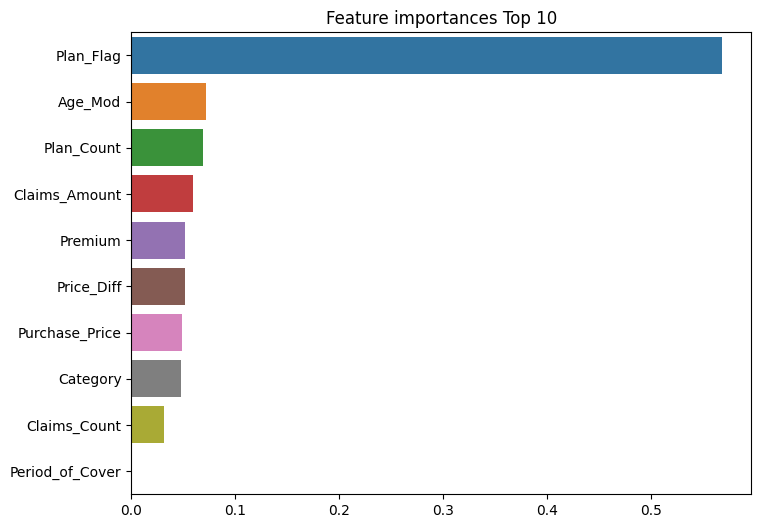

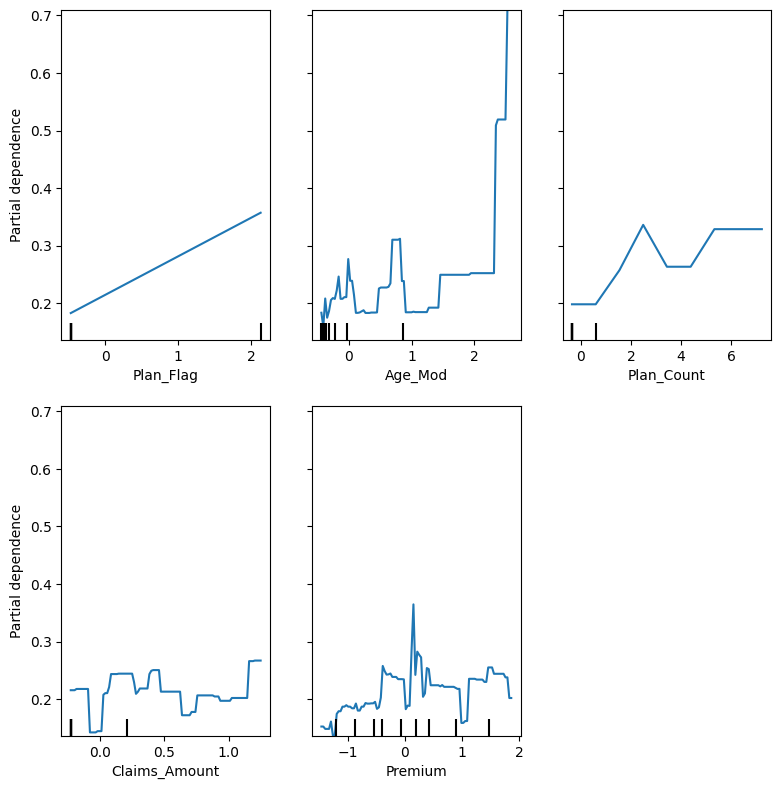

In [148]:
XGB_fea_plot(X_train2, y_train2, X_test2, y_test2, X_df1)

### after feature engineering

In [149]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(new_X_train2, new_y_train2)
w_preds = xgb_wrapper.predict(new_X_test2)
w_pred_proba = xgb_wrapper.predict_proba(new_X_test2)[:, 1]

#feature importance
ftr_importances_values = xgb_wrapper.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=new_X_df1.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]
ftr_top20.index

Index(['Plan_Flag', 'Age_Mod', 'Sold_Premium', 'Plan_Count', 'SP_CA',
       'Price_Diff', 'Category', 'Premium', 'Claims_Amount', 'Purchase_Price'],
      dtype='object')

/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


confusion matrix
[[285  12]
 [ 46  23]]
accuracy: 0.8415, precision: 0.6571, recall: 0.3333,    F1: 0.4423, AUC:0.7273


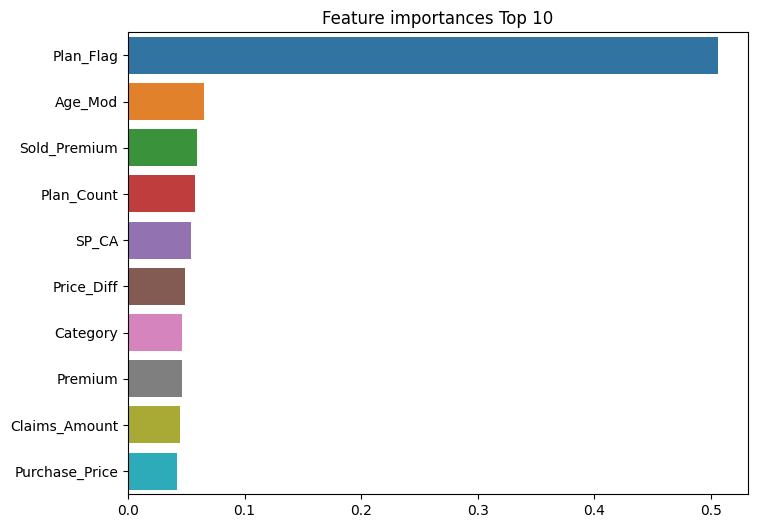

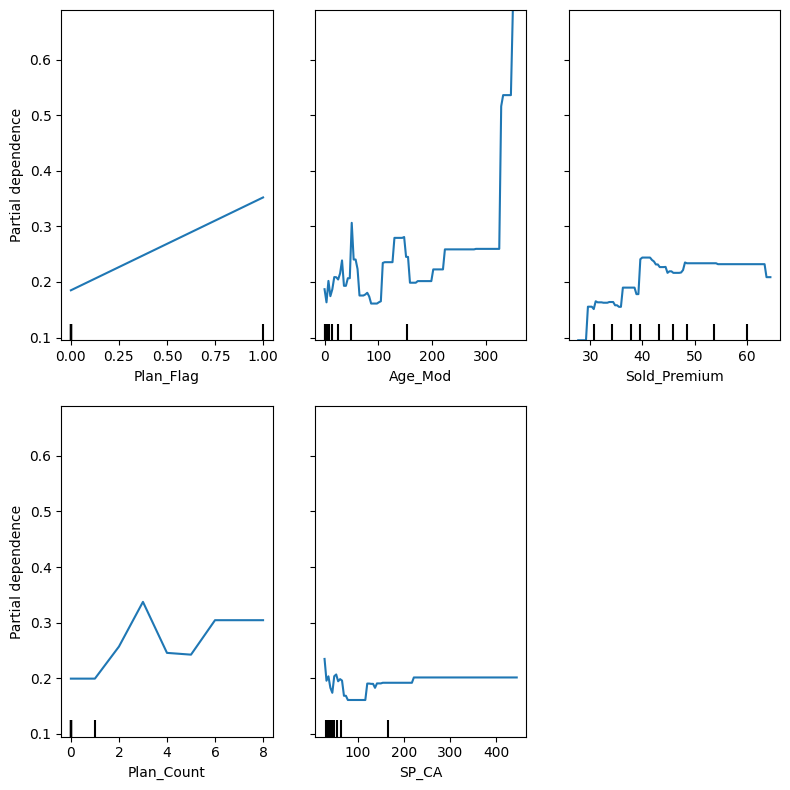

In [150]:
XGB_fea_plot(new_X_train2, new_y_train2, new_X_test2, new_y_test2, new_X_df1)


In [151]:
ftr_top20.index[:5]

Index(['Plan_Flag', 'Age_Mod', 'Sold_Premium', 'Plan_Count', 'SP_CA'], dtype='object')

/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


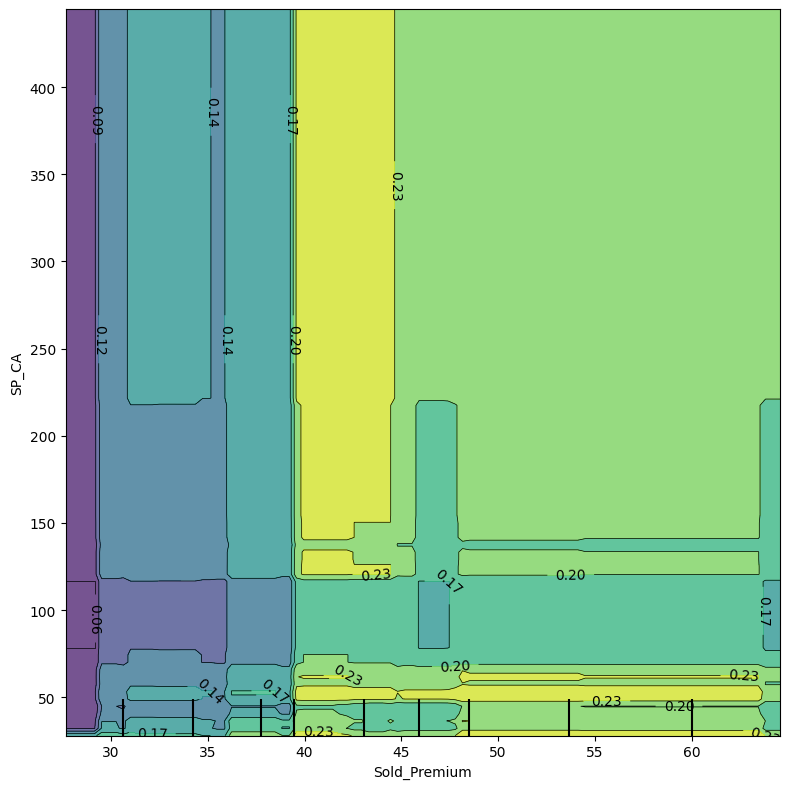

In [152]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(new_X_train2, new_y_train2)
# Partial dependence plot 
#for i in range(4):
plot_partial_dependence(xgb_wrapper, new_X_train2, features=[(ftr_top20.index[2],ftr_top20.index[4])], feature_names=new_X_df1.columns)
plt.tight_layout()
plt.savefig("14.png")

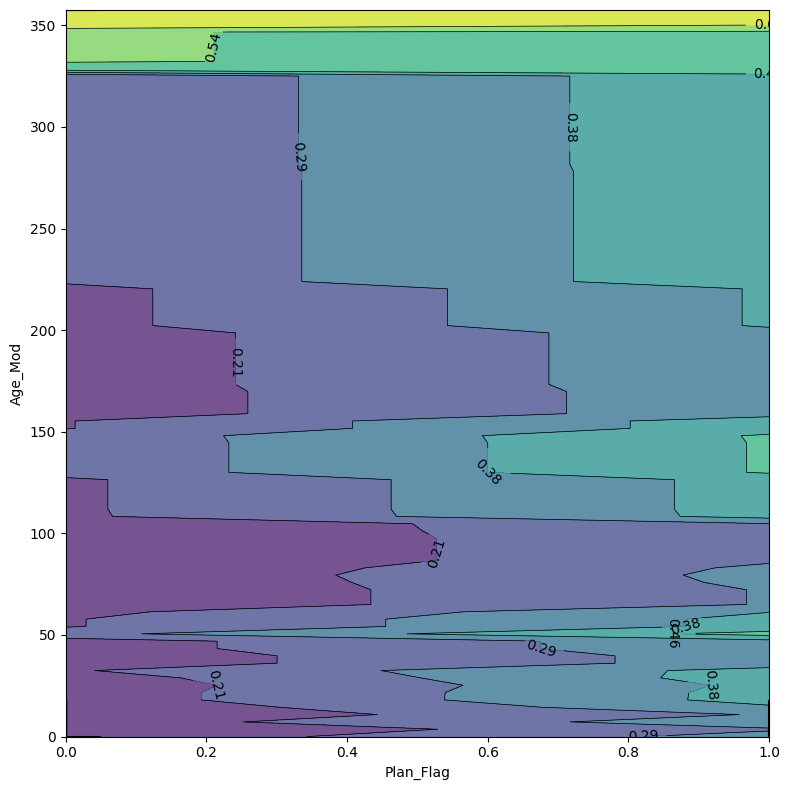

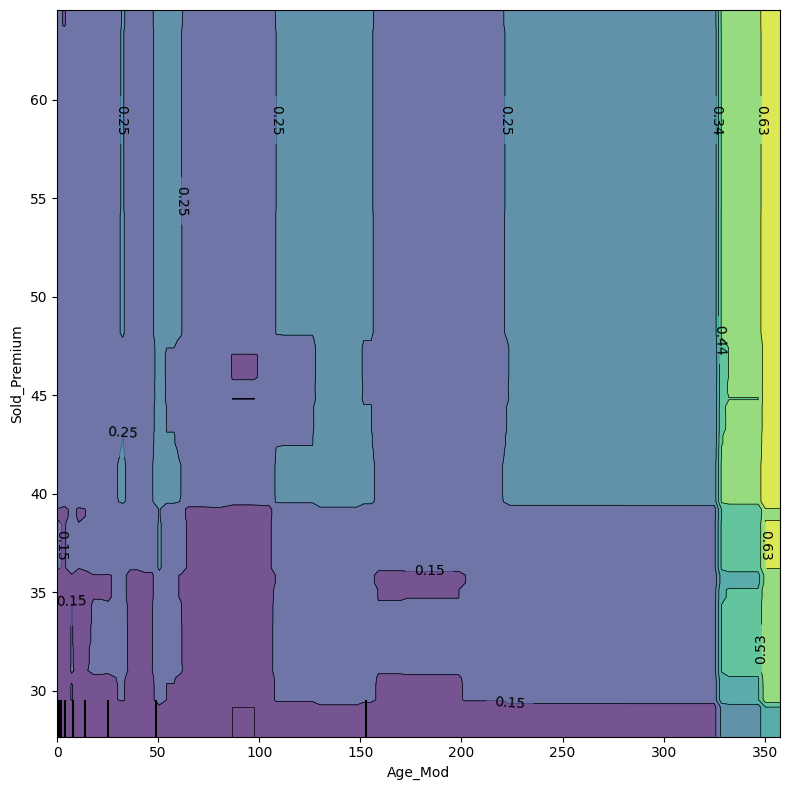

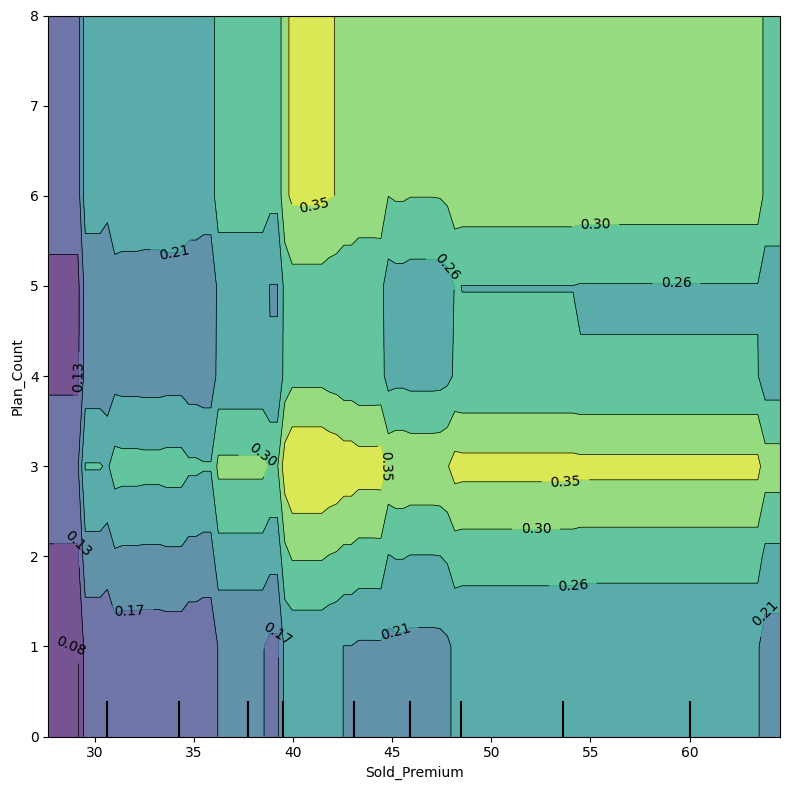

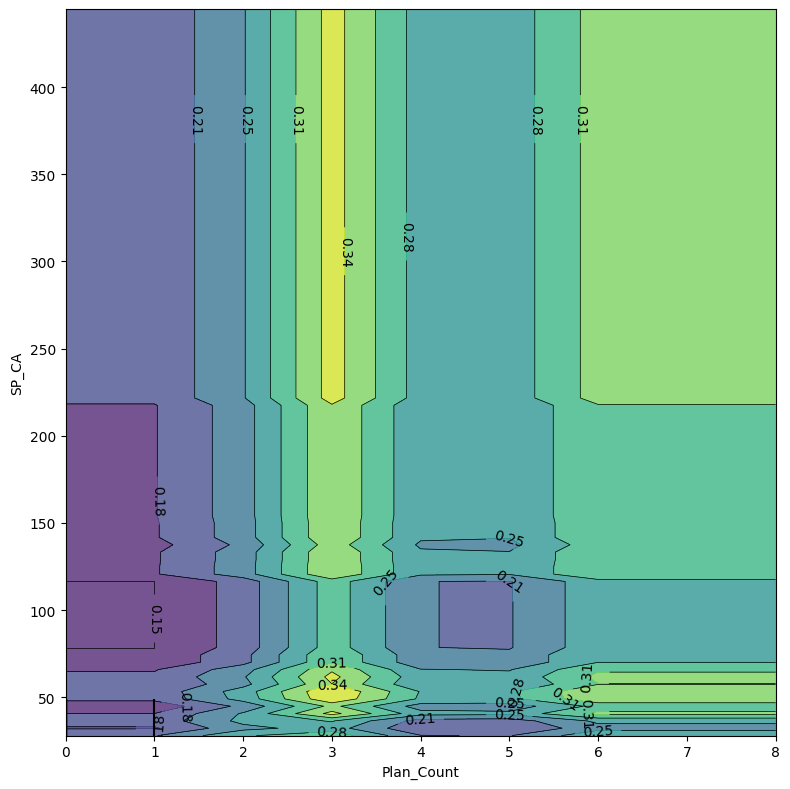

In [153]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(new_X_train2, new_y_train2)
# Partial dependence plot 
for i in range(4):
    plot_partial_dependence(xgb_wrapper, new_X_train2, features=[(ftr_top20.index[i],ftr_top20.index[i+1])], feature_names=new_X_df1.columns)
    plt.tight_layout()
#plt.show()

# f) the impact of a 10% flat price increase in the demand

### metrics and probability demand

In [179]:
def get_clf_eval1(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 
    roc_auc = roc_auc_score(y_test, pred_proba)
    #print('confusion matrix')
    #print(confusion)
    # ROC-AUC print
    #print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    #F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    con=[]
    acc=[]
    pre=[]
    rec=[]
    lf1=[]
    roc=[]
    con.append(confusion)
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    lf1.append(f1)
    roc.append(roc)    
    
    return con, acc, pre, rec, lf1, roc

### 10% increase in price

In [180]:
ins_test = new_X_test2.copy()
ins_test['PriceTest'] = df['PriceTest']
ins_test.loc[ins_test['PriceTest']==0, 'Price_Diff'] = ins_test['Premium']*(0.1)
ins_test.loc[ins_test['PriceTest']==0, 'Sold_Premium'] = ins_test['Premium']+ins_test['Price_Diff']

ins_test.drop(['PriceTest'],axis=1,inplace=True)
    
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(new_X_train2, new_y_train2)
w_preds = xgb_wrapper.predict(new_X_test2)
w_pred_proba = xgb_wrapper.predict_proba(new_X_test2)[:, 1]


ins_w_preds = xgb_wrapper.predict(ins_test)
ins_w_pred_proba = xgb_wrapper.predict_proba(ins_test)[:, 1]


#return get_clf_eval(y_test, pred, pred_proba)
con, acc, pre, rec, lf1, roc = get_clf_eval1(new_y_test2, w_preds, w_pred_proba)
con1, acc1, pre1, rec1, lf11, roc1 = get_clf_eval1(new_y_test2, ins_w_preds, ins_w_pred_proba)

prob=[]
prob_ins =[] 
prob.append(con[0][1][1]/len(new_y_test2))  #Tp/tot_test_cnt
prob_ins.append(con1[0][1][1]/len(new_y_test2)) #Tp/tot_test_cnt

prob.append(w_preds.sum()/len(new_y_test2))  # 1 preediction cnt/tot_test_cnt
prob_ins.append(ins_w_preds.sum()/len(new_y_test2)) # 1 preediction cnt/tot_test_cnt

### test set : Only flat price - for the price elasticity

In [181]:
#ins_test1 = new_X_test2.copy()

ins_test = new_X_test2.copy()
ins_test['PriceTest'] = df['PriceTest']
ins_test.loc[ins_test['PriceTest']==0, 'Price_Diff'] = ins_test['Premium']*(0.1)
ins_test.loc[ins_test['PriceTest']==0, 'Sold_Premium'] = ins_test['Premium']+ins_test['Price_Diff']
ins_test = ins_test[ins_test['PriceTest']==0]
ins_test.drop(['PriceTest'],axis=1,inplace=True)

flat_X_test = new_X_test2.copy()
flat_X_test['PriceTest'] = df['PriceTest']
flat_X_test = flat_X_test[flat_X_test['PriceTest']==0]
flat_X_test.drop(['PriceTest'],axis=1,inplace=True)

flat_y_test = new_y_test2.copy()
flat_y_test = new_y_test2[flat_X_test.index]

    
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(new_X_train2, new_y_train2)
w_preds = xgb_wrapper.predict(flat_X_test)
w_pred_proba = xgb_wrapper.predict_proba(flat_X_test)[:, 1]


ins_w_preds = xgb_wrapper.predict(ins_test)
ins_w_pred_proba = xgb_wrapper.predict_proba(ins_test)[:, 1]


#return get_clf_eval(y_test, pred, pred_proba)
con, acc, pre, rec, lf1, roc = get_clf_eval1(flat_y_test, w_preds, w_pred_proba)
con1, acc1, pre1, rec1, lf11, roc1 = get_clf_eval1(flat_y_test, ins_w_preds, ins_w_pred_proba)

prob=[]
prob_ins =[] 
prob.append(con[0][1][1]/len(flat_y_test))  #Tp/tot_test_cnt
prob_ins.append(con1[0][1][1]/len(flat_y_test)) #Tp/tot_test_cnt

prob.append(w_preds.sum()/len(flat_y_test))  # 1 preediction cnt/tot_test_cnt
prob_ins.append(ins_w_preds.sum()/len(flat_y_test)) # 1 preediction cnt/tot_test_cnt

In [182]:
print(acc, acc1)
print(prob[0], prob_ins[0])
print(prob[1], prob_ins[1])

[0.8545454545454545] [0.806060606060606]
0.07272727272727272 0.06060606060606061
0.10303030303030303 0.12727272727272726


### price increase range 5% ~ 15%

In [183]:
ts_con=[]
ts_acc=[]
ts_pre=[]
ts_rec=[]
ts_lf1=[]
ts_roc=[]
prob_ins =[]

for i in range(20):
    ins_test = new_X_test2.copy()
    ins_test['PriceTest'] = df['PriceTest']
    ins_test.loc[ins_test['PriceTest']==0, 'Price_Diff'] = ins_test['Premium']*(0.05+0.005*i)
    ins_test.loc[ins_test['PriceTest']==0, 'Sold_Premium'] = ins_test['Premium']+ins_test['Price_Diff']
    ins_test = ins_test[ins_test['PriceTest']==0]
    ins_test.drop(['PriceTest'],axis=1,inplace=True)
    
    #pricetest = len(ins_test['PriceTest']==0)
    #flatprice = len(ins_test) - pricetest
    
    flat_X_test = new_X_test2.copy()
    flat_X_test['PriceTest'] = df['PriceTest']
    flat_X_test = flat_X_test[flat_X_test['PriceTest']==0]
    flat_X_test.drop(['PriceTest'],axis=1,inplace=True)
    
    flat_y_test = new_y_test2.copy()
    flat_y_test = new_y_test2[flat_X_test.index]
    
    if i==1:
        xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
        xgb_wrapper.fit(new_X_train2, new_y_train2)
        w_preds = xgb_wrapper.predict(flat_X_test)
        w_pred_proba = xgb_wrapper.predict_proba(flat_X_test)[:, 1]
        
        con, acc, pre, rec, lf1, roc = get_clf_eval1(flat_y_test, w_preds, w_pred_proba)
        prob = (con[0][1][1]/len(flat_y_test), w_preds.sum()/len(flat_y_test))
    
    
    ins_w_preds = xgb_wrapper.predict(ins_test)
    ins_w_pred_proba = xgb_wrapper.predict_proba(ins_test)[:, 1]
    con1, acc1, pre1, rec1, lf11, roc1 = get_clf_eval1(flat_y_test, ins_w_preds, ins_w_pred_proba)   
    
    ts_con.append(con1)
    ts_acc.append(acc1)
    ts_pre.append(pre1)
    ts_rec.append(rec1)
    ts_lf1.append(lf11)
    ts_roc.append(roc1)   
    
    #print(new_y_test2.sum()/len(new_y_test2)) 
    prob_ins.append((0.05+0.005*i, con1[0][1][1]/len(flat_y_test), ins_w_preds.sum()/len(flat_y_test)))
    

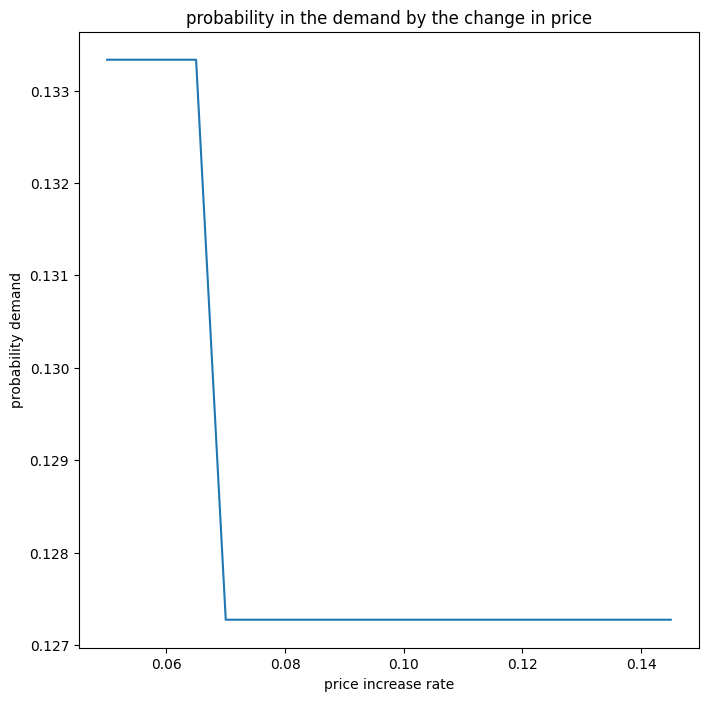

In [184]:
inc_per = [tpl[0] for tpl in prob_ins]
dem_chg = [tpl[2] for tpl in prob_ins]
plt.plot(inc_per, dem_chg)
plt.xlabel('price increase rate')
plt.ylabel('probability demand')
plt.title('probability in the demand by the change in price')

plt.savefig("15.png")

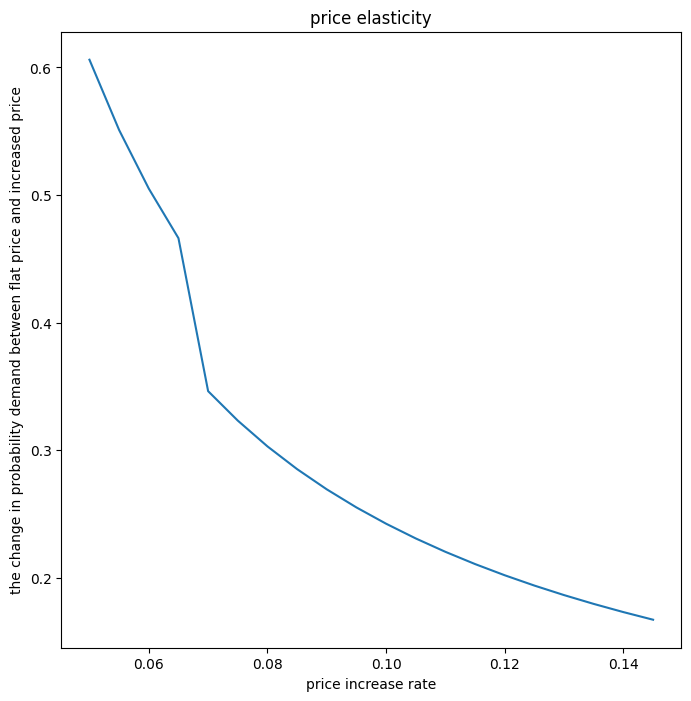

In [185]:
inc_per = [tpl[0] for tpl in prob_ins]
dem_chg = [tpl[2]-prob[1] for tpl in prob_ins]
pr_chg = [inc_per[i] for i in range(len(inc_per))]
pr_ela = [dem_chg[i] / pr_chg[i] for i in range(len(inc_per))]
plt.plot(inc_per, pr_ela)

plt.xlabel('price increase rate')
plt.ylabel('the change in probability demand between flat price and increased price')
plt.title('price elasticity')

plt.savefig("16.png")

In [186]:
prob

(0.07272727272727272, 0.10303030303030303)

In [187]:
prob_ins

[(0.05, 0.06060606060606061, 0.13333333333333333),
 (0.055, 0.06060606060606061, 0.13333333333333333),
 (0.060000000000000005, 0.06060606060606061, 0.13333333333333333),
 (0.065, 0.06060606060606061, 0.13333333333333333),
 (0.07, 0.06060606060606061, 0.12727272727272726),
 (0.07500000000000001, 0.06060606060606061, 0.12727272727272726),
 (0.08, 0.06060606060606061, 0.12727272727272726),
 (0.085, 0.06060606060606061, 0.12727272727272726),
 (0.09, 0.06060606060606061, 0.12727272727272726),
 (0.095, 0.06060606060606061, 0.12727272727272726),
 (0.1, 0.06060606060606061, 0.12727272727272726),
 (0.10500000000000001, 0.06060606060606061, 0.12727272727272726),
 (0.11, 0.06060606060606061, 0.12727272727272726),
 (0.115, 0.06060606060606061, 0.12727272727272726),
 (0.12000000000000001, 0.06060606060606061, 0.12727272727272726),
 (0.125, 0.06060606060606061, 0.12727272727272726),
 (0.13, 0.06060606060606061, 0.12727272727272726),
 (0.135, 0.06060606060606061, 0.12727272727272726),
 (0.14, 0.06060

In [188]:
aa = ([flat_y_test.index[i] for i in range(165)])

In [189]:
#flat_X_test[aa]
index_values = flat_X_test.loc[flat_y_test.index, 'Sold_Premium']

In [190]:
print(index_values.mean())
print(index_values.min())
print(index_values.max())

45.81236363636358
25.44
68.16


In [191]:
index_values1 = ins_test.loc[flat_y_test.index, 'Sold_Premium']
print(index_values1.mean())
print(index_values1.min())
print(index_values1.max())

52.45515636363638
29.128800000000002
78.0432


In [192]:
!pip list

Package                          Version
-------------------------------- --------------------
absl-py                          1.4.0
aiohttp                          3.8.3
aiosignal                        1.3.1
alabaster                        0.7.12
anaconda-client                  1.11.0
anaconda-navigator               2.3.2
anaconda-project                 0.11.1
ansiwrap                         0.8.4
anyio                            3.5.0
appdirs                          1.4.4
applaunchservices                0.3.0
appnope                          0.1.2
appscript                        1.1.2
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
arrow                            1.2.2
astroid                          2.11.7
astropy                          5.1
astunparse                       1.6.3
async-timeout                    4.0.2
atomicwrites                     1.4.0
attrs                            21.4.0
Automat                          20.2.0
au

python-lsp-server                1.5.0
python-slugify                   5.0.2
python-snappy                    0.6.0
python-version                   0.0.2
pytorch-warmup                   0.1.1
pytz                             2022.1
pyviz-comms                      2.0.2
PyWavelets                       1.3.0
PyYAML                           5.4.1
pyzmq                            23.2.0
QDarkStyle                       3.0.2
qstylizer                        0.1.10
QtAwesome                        1.0.3
qtconsole                        5.3.2
QtPy                             2.2.0
queuelib                         1.5.0
recbole                          1.1.1
regex                            2022.7.9
requests                         2.28.1
requests-file                    1.5.1
requests-oauthlib                1.3.1
retrying                         1.3.4
rope                             0.22.0
rsa                              4.9
Rtree                            0.9.7
ruamel.yaml        